In [230]:
# EDA에서 가장 많이 사용하는 모듈들 import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [233]:
! pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
apyori                        1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backpo

python-dateutil               2.8.2
python-dotenv                 0.21.0
python-lsp-black              1.0.0
python-lsp-jsonrpc            1.0.0
python-lsp-server             1.2.4
python-slugify                5.0.2
python-snappy                 0.6.0
pytz                          2021.3
pyviz-comms                   2.0.2
PyWavelets                    1.3.0
pywin32                       302
pywin32-ctypes                0.2.0
pywinpty                      2.0.2
PyYAML                        6.0
pyzmq                         22.3.0
QDarkStyle                    3.0.2
qstylizer                     0.1.10
QtAwesome                     1.0.3
qtconsole                     5.3.0
QtPy                          2.0.1
queuelib                      1.5.0
regex                         2022.3.15
requests                      2.27.1
requests-file                 1.5.1
requests-oauthlib             1.3.1
rope                          0.22.0
rsa                           4.7.2
Rtree                 

In [4]:
# train데이터와 test데이터 불러오기

# train
train = pd.read_csv("data/train.csv")
display(train.head())

# test
test = pd.read_csv("data/test.csv")
display(test.head())

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G


In [178]:
# 각 데이터 확인

train.info()
test.info()
# 결측치도 없고 object로 되어있어서 변경 필요


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      262 non-null    object
 1   father  262 non-null    int64 
 2   mother  262 non-null    int64 
 3   gender  262 non-null    int64 
 4   trait   262 non-null    int64 
 5   SNP_01  262 non-null    object
 6   SNP_02  262 non-null    object
 7   SNP_03  262 non-null    object
 8   SNP_04  262 non-null    object
 9   SNP_05  262 non-null    object
 10  SNP_06  262 non-null    object
 11  SNP_07  262 non-null    object
 12  SNP_08  262 non-null    object
 13  SNP_09  262 non-null    object
 14  SNP_10  262 non-null    object
 15  SNP_11  262 non-null    object
 16  SNP_12  262 non-null    object
 17  SNP_13  262 non-null    object
 18  SNP_14  262 non-null    object
 19  SNP_15  262 non-null    object
 20  class   262 non-null    object
dtypes: int64(4), object(17)
memory usage: 43.1+ KB
<class 'pandas.

In [179]:
display(train.describe())
display(test.describe())

# father, mother, gender 모두 0밖에 없음 >> 데이터에서 제외

,father,mother,gender,trait
count,262.0,262.0,262.0,262.000000
mean,0.0,0.0,0.0,1.736641
std,0.0,0.0,0.0,0.441298
min,0.0,0.0,0.0,1.000000
25%,0.0,0.0,0.0,1.000000
50%,0.0,0.0,0.0,2.000000
75%,0.0,0.0,0.0,2.000000
max,0.0,0.0,0.0,2.000000


,father,mother,gender,trait
count,175.0,175.0,175.0,175.000000
mean,0.0,0.0,0.0,1.708571
std,0.0,0.0,0.0,0.455724
min,0.0,0.0,0.0,1.000000
25%,0.0,0.0,0.0,1.000000
50%,0.0,0.0,0.0,2.000000
75%,0.0,0.0,0.0,2.000000
max,0.0,0.0,0.0,2.000000


In [180]:
for i in train.columns[5:-1]:
    print(train[i].value_counts())
    print(test[i].value_counts())
    print("---------------------")

G G    141
A G     71
A A     50
Name: SNP_01, dtype: int64
G G    84
A G    52
A A    39
Name: SNP_01, dtype: int64
---------------------
G G    108
A G     97
A A     57
Name: SNP_02, dtype: int64
G G    81
A G    57
A A    37
Name: SNP_02, dtype: int64
---------------------
A A    122
C A     92
C C     48
Name: SNP_03, dtype: int64
A A    82
C A    68
C C    25
Name: SNP_03, dtype: int64
---------------------
A A    120
G A     93
G G     49
Name: SNP_04, dtype: int64
G A    76
A A    64
G G    35
Name: SNP_04, dtype: int64
---------------------
A A    94
C A    86
C C    82
Name: SNP_05, dtype: int64
C C    62
C A    61
A A    52
Name: SNP_05, dtype: int64
---------------------
A G    122
G G     79
A A     61
Name: SNP_06, dtype: int64
A G    80
A A    48
G G    47
Name: SNP_06, dtype: int64
---------------------
A A    163
G G     51
G A     48
Name: SNP_07, dtype: int64
A A    101
G A     40
G G     34
Name: SNP_07, dtype: int64
---------------------
G A    96
A A    87
G G    

In [380]:
### value_count dataframe 만들어서 한 눈에 확인
snp = []
sequence = []
cnt = []
rank = []
for i in train.columns[5:-1]:
    target = train[i].value_counts()
    for j in range(len(target)):
        snp.append(i)
        sequence.append(target.index[j])
        cnt.append(target[j])
        rank.append(len(target)-j)
count = pd.DataFrame({"SNP": snp, "sequence":sequence, "count":cnt,"rank":rank})
count.head()

,SNP,sequence,count,rank
0,SNP_01,G G,141,3
1,SNP_01,A G,71,2
2,SNP_01,A A,50,1
3,SNP_02,G G,108,3
4,SNP_02,A G,97,2


In [381]:
count.to_csv("data/count_snp_train.csv", index=False)

In [382]:
## test데이터도 바꿔주기

snp = []
sequence = []
cnt = []
rank = []
for i in train.columns[5:-1]:
    target = test[i].value_counts()
    for j in range(len(target)):
        snp.append(i)
        sequence.append(target.index[j])
        cnt.append(target[j])
        rank.append(len(target)-j)
count_test = pd.DataFrame({"SNP": snp, "sequence":sequence, "count":cnt,"rank":rank})
count_test.head()

,SNP,sequence,count,rank
0,SNP_01,G G,84,3
1,SNP_01,A G,52,2
2,SNP_01,A A,39,1
3,SNP_02,G G,81,3
4,SNP_02,A G,57,2


In [383]:
count_test.to_csv("data/count_snp_test.csv", index=False)

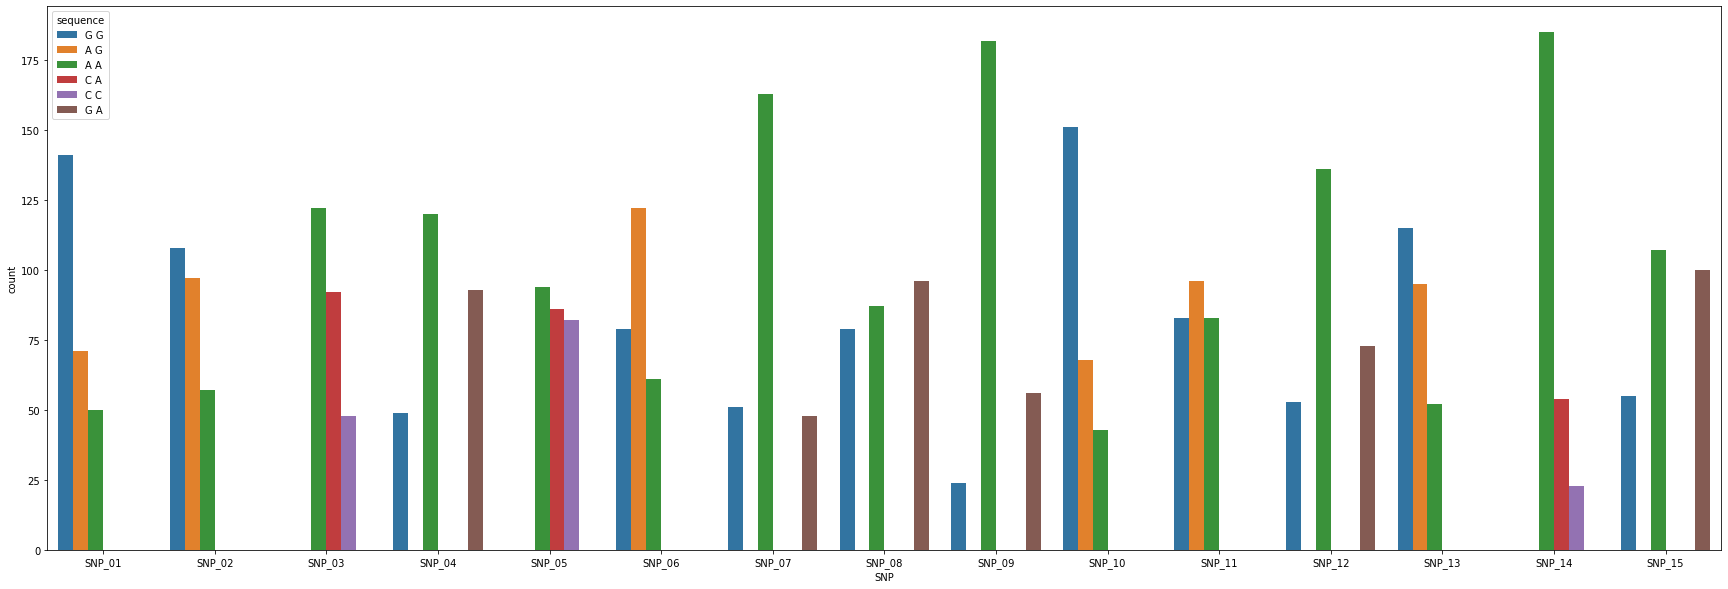

In [183]:
### count 시각화
# hue 속성을 사용하기 위해 seaborn이용
import seaborn as sns

plt.figure(figsize=(30,10))
sns.barplot(x="SNP",y="count", data=count, hue="sequence")
plt.show()

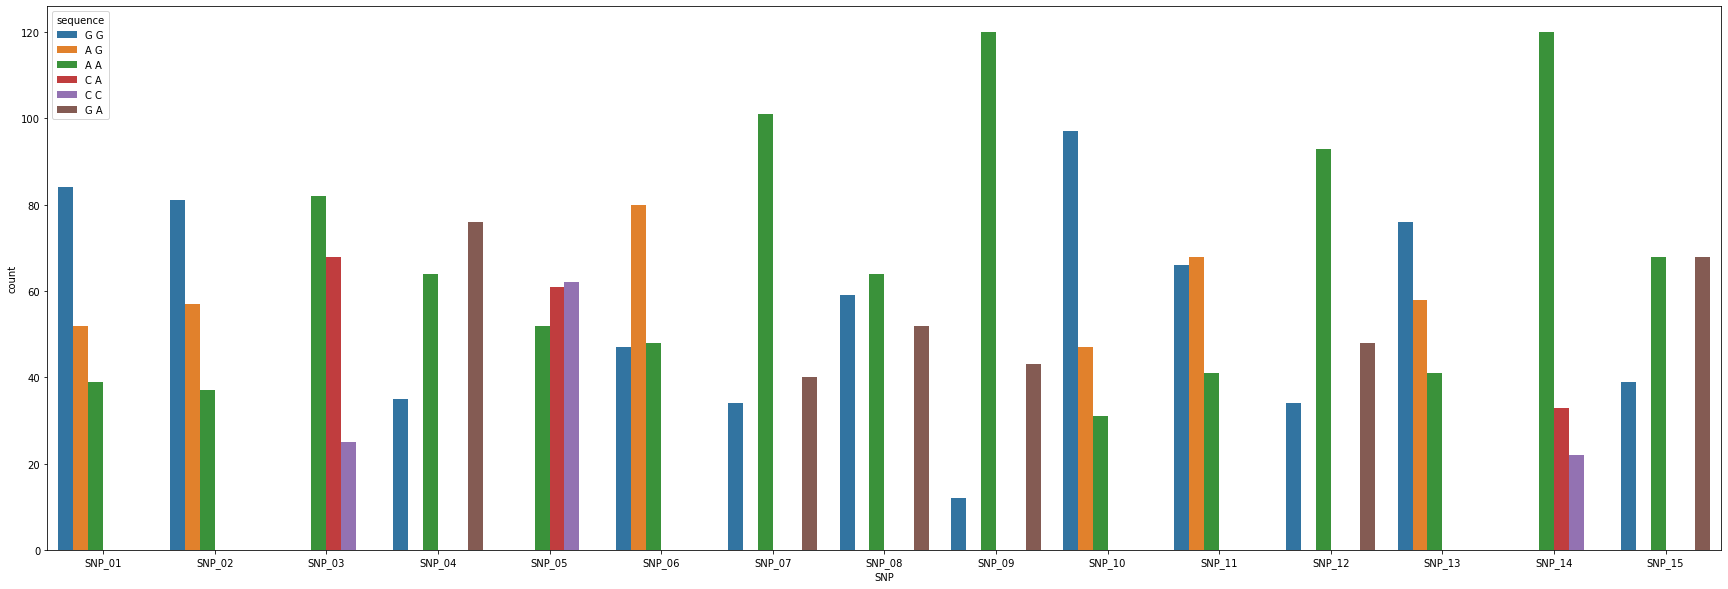

In [184]:
### count_test 시각화
plt.figure(figsize=(30,10))
sns.barplot(x="SNP",y="count", data=count_test, hue="sequence")
plt.show()

In [185]:
### id별로 sequence 종류 개수 세기
# 1. sequence 종류 확인
count["sequence"].value_counts()
# 6개
# index뽑아서 column으로 만들어 주기
column = list(count["sequence"].value_counts().index.values)

train_seq = train.copy()

for i in column:
    train_seq[i]=0
    
train_seq.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,A A,A A,B,0,0,0,0,0,0
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,G G,A A,A A,C,0,0,0,0,0,0
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,A A,A A,B,0,0,0,0,0,0
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A,0,0,0,0,0,0
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A G,A A,G A,C,0,0,0,0,0,0


In [186]:
# 각 id별 sequence count해서 column으로 넣어주기
for index in range(len(train_seq)):
    count_id = train.iloc[index].value_counts()
    for i in range(len(count_id)):
        if count_id.index[i] in column:
            train_seq[str(count_id.index[i])][index]=count_id.values[i]
        else:
            pass

In [187]:
display(train_seq.head())
train_seq.isna().sum()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,A A,A A,B,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,G G,A A,A A,C,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,A A,A A,B,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A G,A A,G A,C,8,3,1,1,0,2


id        0
father    0
mother    0
gender    0
trait     0
SNP_01    0
SNP_02    0
SNP_03    0
SNP_04    0
SNP_05    0
SNP_06    0
SNP_07    0
SNP_08    0
SNP_09    0
SNP_10    0
SNP_11    0
SNP_12    0
SNP_13    0
SNP_14    0
SNP_15    0
class     0
A A       0
G G       0
A G       0
G A       0
C A       0
C C       0
dtype: int64

In [188]:
### test데이터도 seq종류 개수 세기

# 1. sequence 종류 확인
count_test["sequence"].value_counts()
# 6개
# index뽑아서 column으로 만들어 주기
column = list(count_test["sequence"].value_counts().index.values)

test_seq = test.copy()

for i in column:
    test_seq[i]=0

# column에 값 넣기
for index in range(len(test_seq)):
    count_id = test.iloc[index].value_counts()
    for i in range(len(count_id)):
        if count_id.index[i] in column:
            test_seq[str(count_id.index[i])][index]=count_id.values[i]
        else:
            pass

display(test_seq.head())
test_seq.isna().sum()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,...,G A,G G,C A,G A,2,3,4,5,1,0
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,...,A A,A A,A A,A A,8,3,2,0,0,2
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,...,G A,G G,A A,G G,7,3,3,1,1,0
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,...,G A,A G,A A,A A,8,2,2,1,1,1
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,...,G A,G G,A A,G G,5,8,1,1,0,0


id        0
father    0
mother    0
gender    0
trait     0
SNP_01    0
SNP_02    0
SNP_03    0
SNP_04    0
SNP_05    0
SNP_06    0
SNP_07    0
SNP_08    0
SNP_09    0
SNP_10    0
SNP_11    0
SNP_12    0
SNP_13    0
SNP_14    0
SNP_15    0
A A       0
G G       0
A G       0
G A       0
C A       0
C C       0
dtype: int64

In [189]:
test

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A
171,TEST_171,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A
172,TEST_172,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G
173,TEST_173,0,0,0,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A


In [3]:
count_snp_train = pd.read_csv("data/count_snp_train.csv")
count_snp_test = pd.read_csv("data/count_snp_test.csv")

display(count_snp_train.head())
display(count_snp_test.head())

,SNP,sequence,count,rank
0,SNP_01,G G,141,3
1,SNP_01,A G,71,2
2,SNP_01,A A,50,1
3,SNP_02,G G,108,3
4,SNP_02,A G,97,2


,SNP,sequence,count,rank
0,SNP_01,G G,84,3
1,SNP_01,A G,52,2
2,SNP_01,A A,39,1
3,SNP_02,G G,81,3
4,SNP_02,A G,57,2


In [5]:
### test데이터도 seq종류 개수 세기

# 1. sequence 종류 확인
count_snp_test["sequence"].value_counts()
# 6개
# index뽑아서 column으로 만들어 주기
column = list(count_snp_test["sequence"].value_counts().index.values)

test_seq = test.copy()

for i in column:
    test_seq[i]=0

# column에 값 넣기
for index in range(len(test_seq)):
    count_id = test.iloc[index].value_counts()
    for i in range(len(count_id)):
        if count_id.index[i] in column:
            test_seq[str(count_id.index[i])][index]=count_id.values[i]
        else:
            pass

display(test_seq.head())
test_seq.isna().sum()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,...,G A,G G,C A,G A,2,3,4,5,1,0
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,...,A A,A A,A A,A A,8,3,2,0,0,2
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,...,G A,G G,A A,G G,7,3,3,1,1,0
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,...,G A,A G,A A,A A,8,2,2,1,1,1
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,...,G A,G G,A A,G G,5,8,1,1,0,0


id        0
father    0
mother    0
gender    0
trait     0
SNP_01    0
SNP_02    0
SNP_03    0
SNP_04    0
SNP_05    0
SNP_06    0
SNP_07    0
SNP_08    0
SNP_09    0
SNP_10    0
SNP_11    0
SNP_12    0
SNP_13    0
SNP_14    0
SNP_15    0
A A       0
G G       0
A G       0
G A       0
C A       0
C C       0
dtype: int64

In [6]:
### test데이터도 seq종류 개수 세기

# 1. sequence 종류 확인
count_snp_train["sequence"].value_counts()
# 6개
# index뽑아서 column으로 만들어 주기
column = list(count_snp_train["sequence"].value_counts().index.values)

train_seq = train.copy()

for i in column:
    train_seq[i]=0

# column에 값 넣기
for index in range(len(train_seq)):
    count_id = train.iloc[index].value_counts()
    for i in range(len(count_id)):
        if count_id.index[i] in column:
            train_seq[str(count_id.index[i])][index]=count_id.values[i]
        else:
            pass

display(train_seq.head())
train_seq.isna().sum()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,A A,A A,B,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,G G,A A,A A,C,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,A A,A A,B,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A G,A A,G A,C,8,3,1,1,0,2


id        0
father    0
mother    0
gender    0
trait     0
SNP_01    0
SNP_02    0
SNP_03    0
SNP_04    0
SNP_05    0
SNP_06    0
SNP_07    0
SNP_08    0
SNP_09    0
SNP_10    0
SNP_11    0
SNP_12    0
SNP_13    0
SNP_14    0
SNP_15    0
class     0
A A       0
G G       0
A G       0
G A       0
C A       0
C C       0
dtype: int64

In [9]:
## LabelEncoding 하기
from sklearn.preprocessing import LabelEncoder

label = train_seq.columns[5:-7]
le = LabelEncoder()

for labels in label:
    le.fit(train_seq[labels])
    train_seq[labels] = le.transform(train_seq[labels])
    test_seq[labels] = le.transform(test_seq[labels])
    
display(train_seq.head())
display(test_seq.head())

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,2,1,0,1,1,...,0,0,0,B,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,1,1,1,0,0,...,2,0,0,C,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,2,2,0,1,2,...,0,0,0,B,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,0,2,0,1,0,...,2,0,2,A,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,2,2,2,0,2,...,1,0,1,C,8,3,1,1,0,2


,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,TEST_000,0,0,0,1,1,2,0,1,0,...,1,2,1,1,2,3,4,5,1,0
1,TEST_001,0,0,0,2,2,1,2,2,2,...,0,0,0,0,8,3,2,0,0,2
2,TEST_002,0,0,0,2,2,1,0,0,1,...,1,2,0,2,7,3,3,1,1,0
3,TEST_003,0,0,0,2,2,1,1,0,2,...,1,1,0,0,8,2,2,1,1,1
4,TEST_004,0,0,0,1,0,2,0,2,0,...,1,2,0,2,5,8,1,1,0,0


In [10]:
snp_info = pd.read_csv("data/snp_info.csv")
snp_info.head()

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.0546,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.1567,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.2892,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.8749,53826064
4,SNP_05,BovineHD0600017032,6,80.5015,61779512


In [12]:
train_distance = train_seq.copy()

columns = train_distance.columns[5:-7]
for column in columns:
    value = snp_info[snp_info["SNP_id"]==column]["cm"].values[0]
    train_distance[column]=train_distance[column]*value

train_distance.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,134.1092,31.1567,0.0000,77.8749,80.5015,...,0.0000,0.0,0.00000,B,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,67.0546,31.1567,68.2892,0.0000,0.0000,...,126.8362,0.0,0.00000,C,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,134.1092,62.3134,0.0000,77.8749,161.0030,...,0.0000,0.0,0.00000,B,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,0.0000,62.3134,0.0000,77.8749,0.0000,...,126.8362,0.0,3.57548,A,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,134.1092,62.3134,136.5784,0.0000,161.0030,...,63.4181,0.0,1.78774,C,8,3,1,1,0,2


In [13]:
test_distance = test_seq.copy()

for column in columns:
    value = snp_info[snp_info["SNP_id"]==column]["cm"].values[0]
    test_distance[column]=test_distance[column]*value
    
test_distance.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,TEST_000,0,0,0,1,67.0546,62.3134,0.0000,77.8749,0.0000,...,62.7463,126.8362,66.8197,1.78774,2,3,4,5,1,0
1,TEST_001,0,0,0,2,134.1092,31.1567,136.5784,155.7498,161.0030,...,0.0000,0.0000,0.0000,0.00000,8,3,2,0,0,2
2,TEST_002,0,0,0,2,134.1092,31.1567,0.0000,0.0000,80.5015,...,62.7463,126.8362,0.0000,3.57548,7,3,3,1,1,0
3,TEST_003,0,0,0,2,134.1092,31.1567,68.2892,0.0000,161.0030,...,62.7463,63.4181,0.0000,0.00000,8,2,2,1,1,1
4,TEST_004,0,0,0,1,0.0000,62.3134,0.0000,155.7498,0.0000,...,62.7463,126.8362,0.0000,3.57548,5,8,1,1,0,0


In [14]:
train_distance.to_csv("data/train_distance.csv", index=False)
test_distance.to_csv("data/test_distance.csv", index=False)

In [40]:
le.fit(train_distance["class"])
train_distance["class"]=le.transform(train_distance["class"])

train_distance.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,134.1092,31.1567,0.0000,77.8749,80.5015,...,0.0000,0.0,0.00000,1,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,67.0546,31.1567,68.2892,0.0000,0.0000,...,126.8362,0.0,0.00000,2,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,134.1092,62.3134,0.0000,77.8749,161.0030,...,0.0000,0.0,0.00000,1,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,0.0000,62.3134,0.0000,77.8749,0.0000,...,126.8362,0.0,3.57548,0,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,134.1092,62.3134,136.5784,0.0000,161.0030,...,63.4181,0.0,1.78774,2,8,3,1,1,0,2


In [42]:
abs(train_distance.corr()["class"]).sort_values(ascending=False)

class     1.000000
trait     0.826978
G G       0.758586
SNP_04    0.681239
SNP_07    0.668755
A A       0.646373
SNP_11    0.645204
SNP_12    0.644166
SNP_09    0.641171
SNP_02    0.627540
SNP_01    0.538009
SNP_14    0.489962
SNP_06    0.472931
SNP_15    0.414443
SNP_03    0.403247
SNP_10    0.349236
SNP_08    0.327988
A G       0.311001
SNP_13    0.309943
SNP_05    0.207899
C A       0.200181
G A       0.081248
C C       0.017298
father         NaN
mother         NaN
gender         NaN
Name: class, dtype: float64

In [16]:
target = train_distance[train_distance.columns[4:]]

target = target.drop("class", axis=1)
target.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,2,134.1092,31.1567,0.0000,77.8749,80.5015,0.0000,0.00,165.3712,0.000,...,0.0000,0.0000,0.0,0.00000,8,3,2,1,1,0
1,2,67.0546,31.1567,68.2892,0.0000,0.0000,80.5954,0.00,82.6856,0.000,...,62.7463,126.8362,0.0,0.00000,7,1,4,2,1,0
2,2,134.1092,62.3134,0.0000,77.8749,161.0030,161.1908,0.00,82.6856,86.874,...,0.0000,0.0000,0.0,0.00000,7,3,1,3,0,1
3,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,173.748,...,125.4926,126.8362,0.0,3.57548,5,8,1,1,0,0
4,2,134.1092,62.3134,136.5784,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,0.0000,63.4181,0.0,1.78774,8,3,1,1,0,2


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(target, train["class"], test_size=0.2, stratify=train["class"], random_state=42)

X_train.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
123,1,67.0546,31.1567,0.0000,155.7498,0.000,161.1908,161.56,0.0000,173.748,...,62.7463,126.8362,66.8197,1.78774,4,6,2,2,1,0
189,2,134.1092,0.0000,68.2892,0.0000,0.000,80.5954,0.00,82.6856,0.000,...,0.0000,63.4181,0.0000,0.00000,9,1,3,1,1,0
49,1,0.0000,62.3134,0.0000,77.8749,0.000,161.1908,161.56,0.0000,86.874,...,62.7463,126.8362,66.8197,3.57548,5,6,0,3,1,0
198,2,134.1092,31.1567,68.2892,0.0000,161.003,0.0000,0.00,165.3712,86.874,...,0.0000,63.4181,0.0000,1.78774,5,4,2,2,1,1
29,1,67.0546,62.3134,0.0000,77.8749,0.000,161.1908,161.56,0.0000,86.874,...,125.4926,126.8362,0.0000,3.57548,5,7,1,2,0,0


In [19]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(X_train, y_train)
pred_logistic = logistic.predict(X_val)

from sklearn.metrics import f1_score
logistic_score = f1_score(y_val, pred_logistic, average="macro")
logistic_score

0.9821551132463967

In [32]:
logistic = LogisticRegression(C=5, max_iter=1000)

logistic.fit(X_train, y_train)
pred_logistic = logistic.predict(X_val)

logistic_score = f1_score(y_val, pred_logistic, average="macro")
logistic_score

0.9824915824915825

In [53]:
# 오답 확인

check = pd.DataFrame({"answer" : y_val, "predict":pred_logistic})
check = check.reset_index()

In [55]:
true = []
for i in range(len(check)):
    if check["answer"][i]==check["predict"][i]:
        true.append(True)
    else:
        true.append(False)


check["check"]=true
check.head()

,index,answer,predict,check
0,15,A,A,True
1,139,B,B,True
2,204,A,A,True
3,114,B,B,True
4,16,A,A,True


In [62]:
false_index = check[check["check"]==False]["index"].values[0]

In [143]:
check[check["index"]==false_index] # B와 C를 헷갈림

,index,answer,predict,check
50,192,B,C,False


In [65]:
target.iloc[[false_index]].T.value_counts() # 0이 너무 많다..?(0대신 값을 넣어줘야 하나)

192     
0.0000      10
3.0000       2
1.0000       1
2.0000       1
8.0000       1
31.1567      1
63.4181      1
80.5954      1
124.1384     1
134.1092     1
161.0030     1
194.3462     1
dtype: int64

In [161]:
target.iloc[[false_index]]

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
192,2,134.1092,31.1567,0.0,0.0,161.003,80.5954,0.0,0.0,0.0,...,0.0,63.4181,0.0,0.0,8,3,3,0,0,1


In [33]:
result = pd.read_csv('data/sample_submission.csv')
result.head()

,id,class
0,TEST_000,A
1,TEST_001,A
2,TEST_002,A
3,TEST_003,A
4,TEST_004,A


In [37]:
test_distance_target = test_distance[test_distance.columns[4:]]

In [38]:
test_predict = logistic.predict(test_distance_target)

result["class"]=test_predict
result.head()

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,C
4,TEST_004,A


In [39]:
result.to_csv("data/submission_test.csv", index=False)

## 각 값을 counting rank로 대체해보자

In [190]:
# 각 sequence로 되어 있는 SNP column의 값을 count dataframe에 있는 rank로 변환
# label encoding 효과 + rank가중치로 전환되도록

for cnt in range(len(count)):
    if cnt%3 ==0:
        for seq in range(len(train_seq)):
            value = count[(count["SNP"]==count["SNP"][cnt])&(count["sequence"]==train_seq[count["SNP"][cnt]][seq])]["rank"].values[0]
            train_seq[count["SNP"][cnt]][seq]=value
    else:
        pass
        
train_seq.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,3,2,3,2,2,...,1,3,3,B,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,2,2,2,3,3,...,3,3,3,C,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,3,3,3,2,1,...,1,3,3,B,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,1,3,3,2,3,...,3,3,1,A,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,3,3,1,3,1,...,2,3,2,C,8,3,1,1,0,2


In [191]:
# test데이터도 바꿔주기
# 각 sequence로 되어 있는 SNP column의 값을 count_test dataframe에 있는 rank로 변환
# label encoding 효과 + rank가중치로 전환되도록

for cnt in range(len(count_test)):
    if cnt%3 ==0:
        for seq in range(len(test_seq)):
            value = count_test[(count_test["SNP"]==count_test["SNP"][cnt])&(count_test["sequence"]==test_seq[count_test["SNP"][cnt]][seq])]["rank"].values[0]
            test_seq[count_test["SNP"][cnt]][seq]=value
    else:
        pass
        
test_seq.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,TEST_000,0,0,0,1,2,3,3,3,1,...,2,3,2,3,2,3,4,5,1,0
1,TEST_001,0,0,0,2,3,2,1,1,3,...,3,1,3,2,8,3,2,0,0,2
2,TEST_002,0,0,0,2,3,2,3,2,2,...,2,3,3,1,7,3,3,1,1,0
3,TEST_003,0,0,0,2,3,2,2,2,3,...,2,2,3,2,8,2,2,1,1,1
4,TEST_004,0,0,0,1,1,3,3,1,1,...,2,3,3,1,5,8,1,1,0,0


In [192]:
### snp정보 가져오기
snp_info = pd.read_csv("data/snp_info.csv")
snp_info.head()

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.0546,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.1567,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.2892,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.8749,53826064
4,SNP_05,BovineHD0600017032,6,80.5015,61779512


In [119]:
### snp 거리와 염색체 종류가 영향을 줄 것이라고 생각

# SNP 거리 각 값에 곱해주기
snp_info["cm"]

0     67.05460
1     31.15670
2     68.28920
3     77.87490
4     80.50150
5     80.59540
6     80.78000
7     82.68560
8     86.87400
9     62.06920
10    97.17310
11    62.74630
12    63.41810
13    66.81970
14     1.78774
Name: cm, dtype: float64

In [122]:
# class를 숫자로 labeling한 다음 상관계수 확인

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_seq["class"])
train_seq["class"]=le.transform(train_seq["class"])
train_seq.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,3,2,3,2,2,...,1,3,3,1,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,2,2,2,3,3,...,3,3,3,2,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,3,3,3,2,1,...,1,3,3,1,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,1,3,3,2,3,...,3,3,1,0,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,3,3,1,3,1,...,2,3,2,2,8,3,1,1,0,2


In [127]:
for i in train_seq.columns[5:-7]:
    train_seq[i] = pd.to_numeric(train_seq[i])
    
train_seq.info()
train_seq.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      262 non-null    object
 1   father  262 non-null    int64 
 2   mother  262 non-null    int64 
 3   gender  262 non-null    int64 
 4   trait   262 non-null    int64 
 5   SNP_01  262 non-null    int64 
 6   SNP_02  262 non-null    int64 
 7   SNP_03  262 non-null    int64 
 8   SNP_04  262 non-null    int64 
 9   SNP_05  262 non-null    int64 
 10  SNP_06  262 non-null    int64 
 11  SNP_07  262 non-null    int64 
 12  SNP_08  262 non-null    int64 
 13  SNP_09  262 non-null    int64 
 14  SNP_10  262 non-null    int64 
 15  SNP_11  262 non-null    int64 
 16  SNP_12  262 non-null    int64 
 17  SNP_13  262 non-null    int64 
 18  SNP_14  262 non-null    int64 
 19  SNP_15  262 non-null    int64 
 20  class   262 non-null    int32 
 21  A A     262 non-null    int64 
 22  G G     262 non-null    in

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,3,2,3,2,2,...,1,3,3,1,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,2,2,2,3,3,...,3,3,3,2,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,3,3,3,2,1,...,1,3,3,1,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,1,3,3,2,3,...,3,3,1,0,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,3,3,1,3,1,...,2,3,2,2,8,3,1,1,0,2


In [135]:
seq_corr = abs(train_seq.corr()["class"]).sort_values(ascending=False)

In [129]:
### snp 거리를 각 값에 곱해 준 다음 상관계수 다시 확인

train_distance = train_seq.copy()
train_distance.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,3,2,3,2,2,...,1,3,3,1,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,2,2,2,3,3,...,3,3,3,2,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,3,3,3,2,1,...,1,3,3,1,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,1,3,3,2,3,...,3,3,1,0,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,3,3,1,3,1,...,2,3,2,2,8,3,1,1,0,2


In [133]:
for column in train_distance.columns[5:-7]:
    multiple = snp_info[snp_info["SNP_id"]==column]["cm"].values[0]
    train_distance[column]=train_distance[column]*multiple
    
train_distance.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,201.1638,62.3134,204.8676,155.7498,161.0030,...,63.4181,200.4591,5.36322,1,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,134.1092,62.3134,136.5784,233.6247,241.5045,...,190.2543,200.4591,5.36322,2,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,201.1638,93.4701,204.8676,155.7498,80.5015,...,63.4181,200.4591,5.36322,1,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,67.0546,93.4701,204.8676,155.7498,241.5045,...,190.2543,200.4591,1.78774,0,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,201.1638,93.4701,68.2892,233.6247,80.5015,...,126.8362,200.4591,3.57548,2,8,3,1,1,0,2


In [136]:
distance_corr = abs(train_distance.corr()["class"]).sort_values(ascending=False)

In [140]:
pd.DataFrame([seq_corr, distance_corr]).T
# 상관계수 차이 없음 >> 효과 없는 듯
# GG, AA가 비슷한 다른 것에 비해 눈에 띄게 효과가 좋음 >> 개수에 가중치를 더 둬보자

,class,class
class,1.000000,1.000000
trait,0.826978,0.826978
G G,0.758586,0.758586
SNP_04,0.681239,0.681239
A A,0.646373,0.646373
SNP_12,0.644166,0.644166
SNP_09,0.641171,0.641171
SNP_02,0.627540,0.627540
SNP_01,0.538009,0.538009
SNP_14,0.489962,0.489962


In [166]:
train_seq.columns[5:-7]

Index(['SNP_01', 'SNP_02', 'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07',
       'SNP_08', 'SNP_09', 'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14',
       'SNP_15'],
      dtype='object')

In [193]:
### 각 SNP 별로 count한 값을 곱해서 상관계수를 구해보자
train_count = train_seq.copy()

for column in train_seq.columns[5:-7]:
    for index in range(len(train_seq)):
        value = count[(count["SNP"]==column)&(count["rank"]==train_seq[column][index])]["count"].values[0]
        train_count[column][index] = train_seq[column][index]*value

train_count.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,423,194,366,186,172,...,52,555,321,B,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,142,194,184,360,282,...,345,555,321,C,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,423,324,366,186,82,...,52,555,321,B,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,50,324,366,186,282,...,345,555,55,A,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,423,324,48,360,82,...,190,555,200,C,8,3,1,1,0,2


In [170]:
count_corr = abs(train_count.corr()["class"]).sort_values(ascending=False)

In [236]:
train_distance = pd.read_csv("data/train_distance.csv")
train_seq = pd.read_csv("data/train_seq.csv")
train_count = pd.read_csv("data/train_count.csv")

In [238]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_distance["class"])
train_distance["class"] = le.transform(train_distance["class"])
train_seq["class"]=le.transform(train_seq["class"])
train_count["class"]=le.transform(train_count["class"])

train_count.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,423,194,366,186,172,...,52,555,321,1,8,3,2,1,1,0
1,TRAIN_001,0,0,0,2,142,194,184,360,282,...,345,555,321,2,7,1,4,2,1,0
2,TRAIN_002,0,0,0,2,423,324,366,186,82,...,52,555,321,1,7,3,1,3,0,1
3,TRAIN_003,0,0,0,1,50,324,366,186,282,...,345,555,55,0,5,8,1,1,0,0
4,TRAIN_004,0,0,0,2,423,324,48,360,82,...,190,555,200,2,8,3,1,1,0,2


In [242]:
seq_corr = abs(train_seq.corr()["class"]).sort_values(ascending=False)
distance_corr = abs(train_distance.corr()["class"]).sort_values(ascending=False)
count_corr = abs(train_count.corr()["class"]).sort_values(ascending=False)

In [258]:
correlation = pd.DataFrame({"label_count_rank":seq_corr, "labelencoding*distance":distance_corr,"label_rank*count":count_corr})

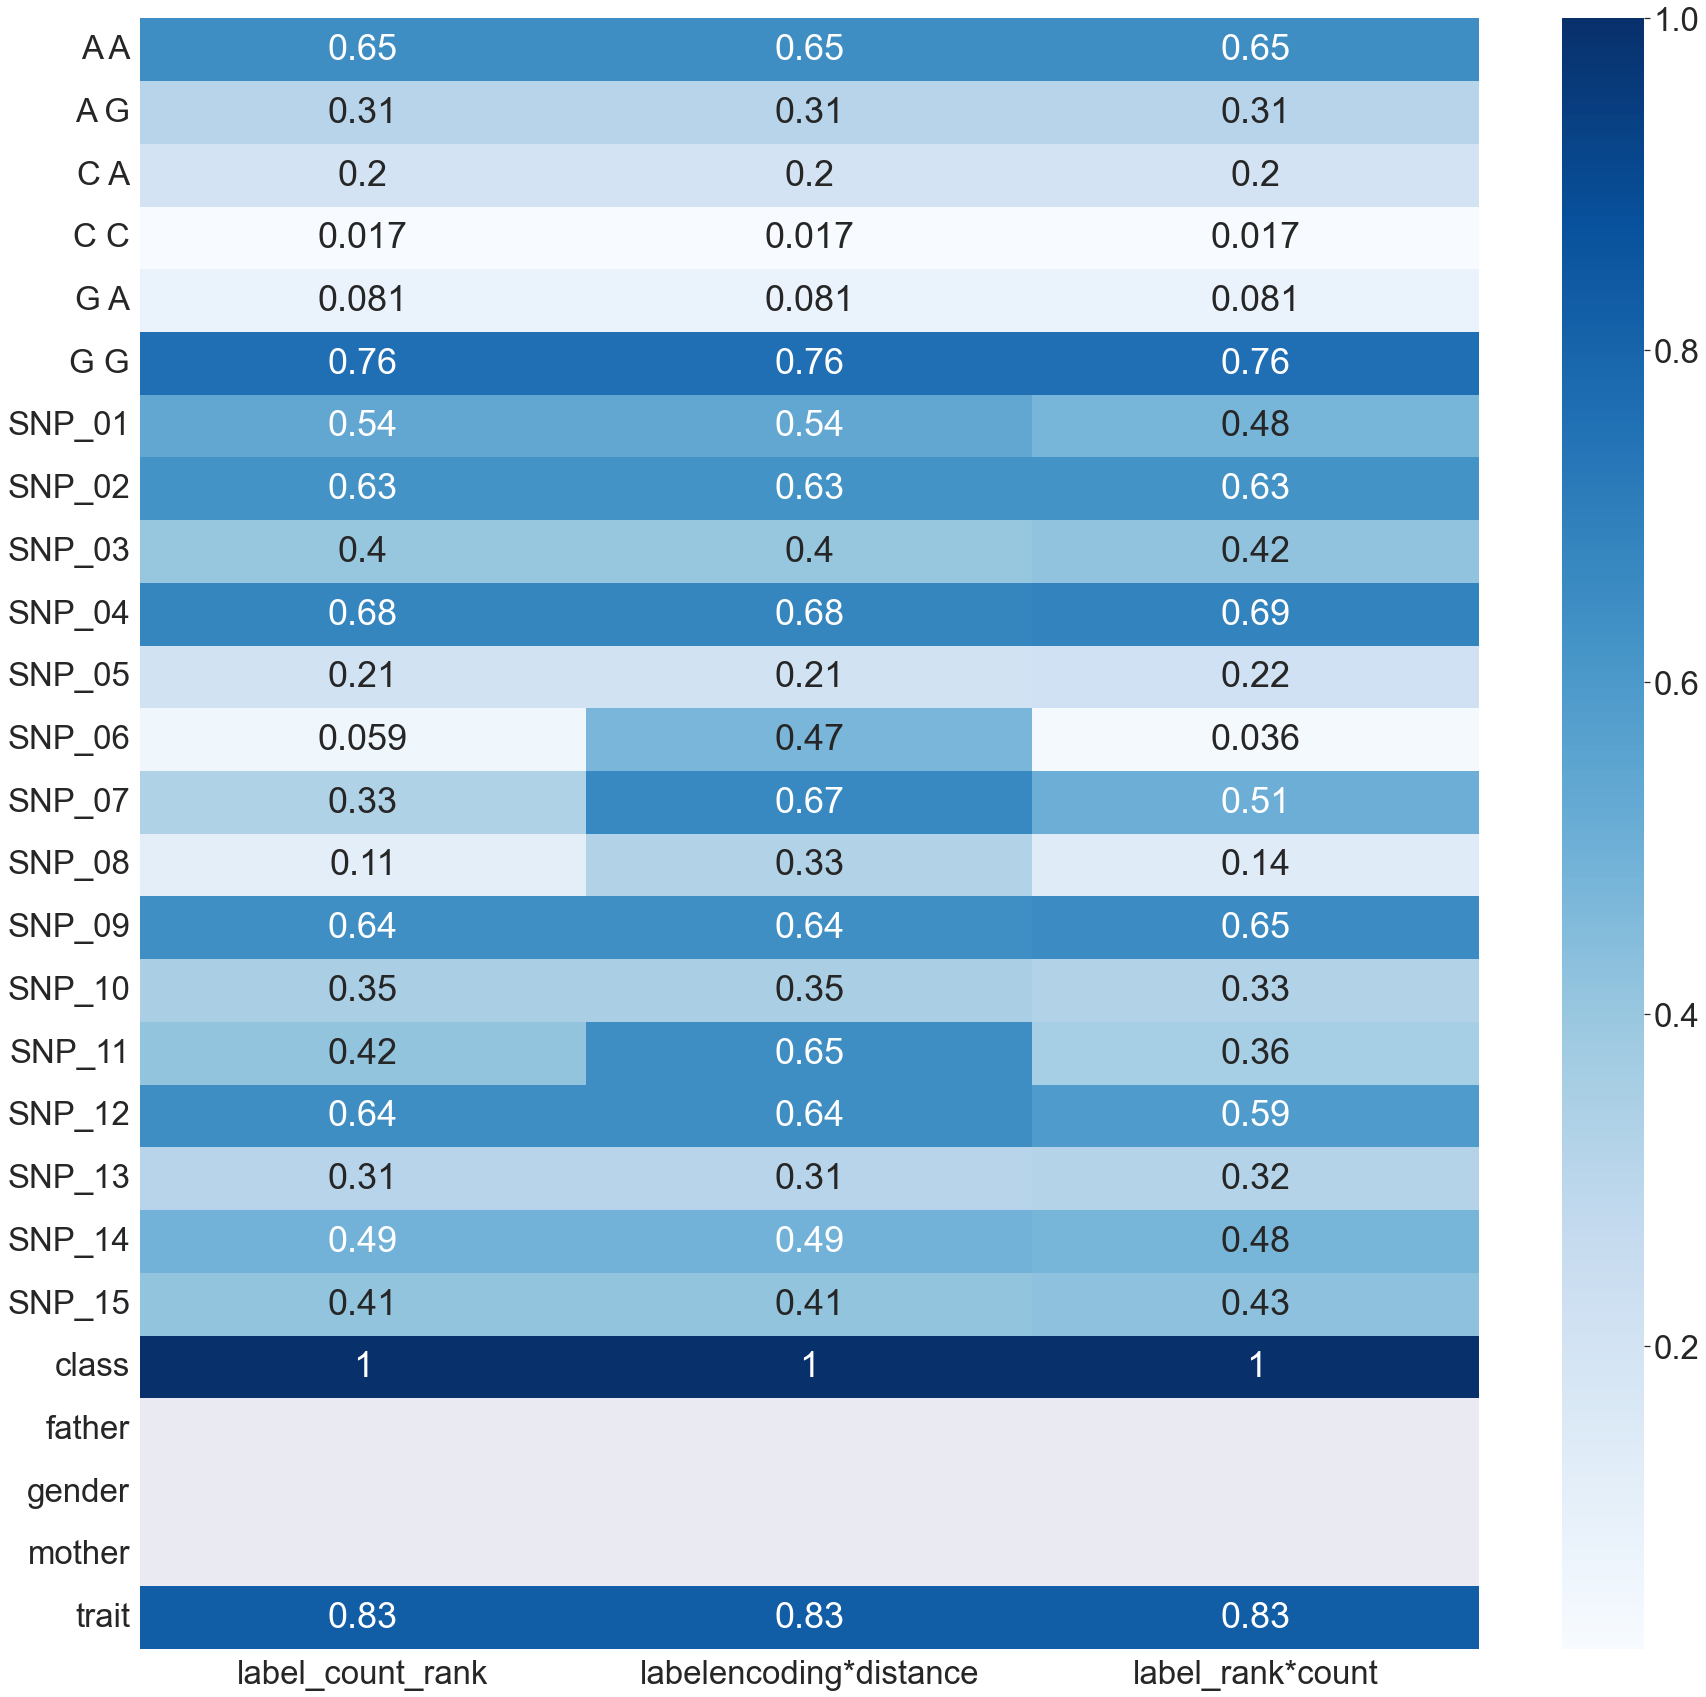

In [276]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation, cmap="Blues", annot=True)
sns.set(font_scale=3)

In [171]:
pd.DataFrame([seq_corr, distance_corr, count_corr]).T
# 일부 증가한 것도 있고 감소한 것도 있음 
# 증가한 컬럼의 개수와 감소한 컬럼의 개수가 같음

,class,class,class
class,1.000000,1.000000,1.000000
trait,0.826978,0.826978,0.826978
G G,0.758586,0.758586,0.758586
SNP_04,0.681239,0.681239,0.686175
A A,0.646373,0.646373,0.646373
SNP_12,0.644166,0.644166,0.590917
SNP_09,0.641171,0.641171,0.651087
SNP_02,0.627540,0.627540,0.625418
SNP_01,0.538009,0.538009,0.479288
SNP_14,0.489962,0.489962,0.480591


In [194]:
### test도 변환해주자

test_count = test_seq.copy()

for column in test_seq.columns[5:-7]:
    for index in range(len(test_seq)):
        value = count_test[(count_test["SNP"]==column)&(count_test["rank"]==test_seq[column][index])]["count"].values[0]
        test_count[column][index] = test_seq[column][index]*value

test_count.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,TEST_000,0,0,0,1,104,243,246,228,52,...,96,228,66,3,2,3,4,5,1,0
1,TEST_001,0,0,0,2,252,114,25,35,186,...,279,41,360,2,8,3,2,0,0,2
2,TEST_002,0,0,0,2,252,114,246,128,122,...,96,228,360,1,7,3,3,1,1,0
3,TEST_003,0,0,0,2,252,114,136,128,186,...,96,116,360,2,8,2,2,1,1,1
4,TEST_004,0,0,0,1,39,243,246,35,52,...,96,228,360,1,5,8,1,1,0,0


In [195]:
test_seq.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,TEST_000,0,0,0,1,2,3,3,3,1,...,2,3,2,3,2,3,4,5,1,0
1,TEST_001,0,0,0,2,3,2,1,1,3,...,3,1,3,2,8,3,2,0,0,2
2,TEST_002,0,0,0,2,3,2,3,2,2,...,2,3,3,1,7,3,3,1,1,0
3,TEST_003,0,0,0,2,3,2,2,2,3,...,2,2,3,2,8,2,2,1,1,1
4,TEST_004,0,0,0,1,1,3,3,1,1,...,2,3,3,1,5,8,1,1,0,0


In [196]:
# GG, AA를 제외하고 나머지 개수 센 것은 scaler로 낮추자

scale = train_seq.columns[-4:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for column in scale:
    scaler.fit(train_seq[column].values.reshape(-1,1))
    train_seq[column] = scaler.transform(train_seq[column].values.reshape(-1,1))
    
train_seq.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,3,2,3,2,2,...,1,3,3,B,8,3,-0.074778,-0.741157,0.166063,-0.919603
1,TRAIN_001,0,0,0,2,2,2,2,3,3,...,3,3,3,C,7,1,1.492561,0.210721,0.166063,-0.919603
2,TRAIN_002,0,0,0,2,3,3,3,2,1,...,1,3,3,B,7,3,-0.858447,1.162599,-1.284220,0.655142
3,TRAIN_003,0,0,0,1,1,3,3,2,3,...,3,3,1,A,5,8,-0.858447,-0.741157,-1.284220,-0.919603
4,TRAIN_004,0,0,0,2,3,3,1,3,1,...,2,3,2,C,8,3,-0.858447,-0.741157,-1.284220,2.229888


In [146]:
# 앞에서 잘못 바꿔서 다시 돌려 놓기
# train_seq["A A"] = train_distance["A A"]
# train_seq["G G"] = train_distance["G G"]

# train_seq.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,3,2,3,2,2,...,1,3,3,1,8,3,-0.074778,-0.741157,0.166063,-0.919603
1,TRAIN_001,0,0,0,2,2,2,2,3,3,...,3,3,3,2,7,1,1.492561,0.210721,0.166063,-0.919603
2,TRAIN_002,0,0,0,2,3,3,3,2,1,...,1,3,3,1,7,3,-0.858447,1.162599,-1.284220,0.655142
3,TRAIN_003,0,0,0,1,1,3,3,2,3,...,3,3,1,0,5,8,-0.858447,-0.741157,-1.284220,-0.919603
4,TRAIN_004,0,0,0,2,3,3,1,3,1,...,2,3,2,2,8,3,-0.858447,-0.741157,-1.284220,2.229888


In [197]:
# test도 변환
# GG, AA를 제외하고 나머지 개수 센 것은 scaler로 낮추자

scale = test_seq.columns[-4:]

for column in scale:
    test_seq[column] = scaler.transform(test_seq[column].values.reshape(-1,1))
    
test_seq.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,TEST_000,0,0,0,1,2,3,3,3,1,...,2,3,2,3,2,3,5.379379,6.954125,0.655142,-0.919603
1,TEST_001,0,0,0,2,3,2,1,1,3,...,3,1,3,2,8,3,2.229888,-0.919603,-0.919603,2.229888
2,TEST_002,0,0,0,2,3,2,3,2,2,...,2,3,3,1,7,3,3.804633,0.655142,0.655142,-0.919603
3,TEST_003,0,0,0,2,3,2,2,2,3,...,2,2,3,2,8,2,2.229888,0.655142,0.655142,0.655142
4,TEST_004,0,0,0,1,1,3,3,1,1,...,2,3,3,1,5,8,0.655142,0.655142,-0.919603,-0.919603


In [206]:
columns = train.columns[5:-1]

In [210]:
from sklearn.preprocessing import LabelEncoder

train_label = train.copy()
test_label = test.copy()

le = LabelEncoder()
for i in columns:
    le.fit(train_label[i])
    train_label[i]=le.transform(train_label[i])
    test_label[i]=le.transform(test_label[i])
    
train_label.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,2,1,0,1,1,...,0,2,0,2,1,0,0,0,0,B
1,TRAIN_001,0,0,0,2,1,1,1,0,0,...,0,1,0,1,0,1,2,0,0,C
2,TRAIN_002,0,0,0,2,2,2,0,1,2,...,0,1,1,1,0,0,0,0,0,B
3,TRAIN_003,0,0,0,1,0,2,0,1,0,...,2,0,2,1,2,2,2,0,2,A
4,TRAIN_004,0,0,0,2,2,2,2,0,2,...,0,0,0,2,0,0,1,0,1,C


In [ ]:
# SNP06, SNP07, SNP08, SNP11 >> 관계가 더 높으므로 (train_label에서)
# SNP01, SNP02, SNP10, SNP12, SNP14 >> train_seq사용(AA포함 >> train_seq를 기본으로 하기)
# 나머지 >> train_count사용(3,4,5,9,13,15)

In [198]:
# 학습 시킬 target 가져오기

train_target = train_seq[train_seq.columns[4:]]
train_target = train_target.drop("class", axis=1)
train_target.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,2,3,2,3,2,2,1,3,1,3,...,3,1,3,3,8,3,-0.074778,-0.741157,0.166063,-0.919603
1,2,2,2,2,3,3,3,3,3,3,...,2,3,3,3,7,1,1.492561,0.210721,0.166063,-0.919603
2,2,3,3,3,2,1,2,3,3,2,...,3,1,3,3,7,3,-0.858447,1.162599,-1.284220,0.655142
3,1,1,3,3,2,3,2,2,2,1,...,1,3,3,1,5,8,-0.858447,-0.741157,-1.284220,-0.919603
4,2,3,3,1,3,1,1,3,2,3,...,3,2,3,2,8,3,-0.858447,-0.741157,-1.284220,2.229888


In [212]:
labels = ["SNP_06", "SNP_07", "SNP_08", "SNP_11"]
counts = ["SNP_03", "SNP_04","SNP_05","SNP_09","SNP_13","SNP_15"]

for label in labels:
    train_target[label]=train_label[label]
    
for count in counts:
    train_target[count]=train_count[count]
    
train_target.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,2,3,2,366,186,172,0,0,2,546,...,3,52,3,321,8,3,-0.074778,-0.741157,0.166063,-0.919603
1,2,2,2,184,360,282,1,0,1,546,...,2,345,3,321,7,1,1.492561,0.210721,0.166063,-0.919603
2,2,3,3,366,186,82,2,0,1,112,...,3,52,3,321,7,3,-0.858447,1.162599,-1.284220,0.655142
3,1,1,3,366,186,282,2,2,0,24,...,1,345,3,55,5,8,-0.858447,-0.741157,-1.284220,-0.919603
4,2,3,3,48,360,82,0,0,0,546,...,3,190,3,200,8,3,-0.858447,-0.741157,-1.284220,2.229888


In [250]:
target_columns = train_target.columns[:-4]

In [251]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

for scale in target_columns:
    minmax.fit(train_target[scale].values.reshape(-1,1))
    train_target[scale] = minmax.transform(train_target[scale].values.reshape(-1,1))
    test_target[scale] = minmax.transform(test_target[scale].values.reshape(-1,1))
    
train_target.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,1.0,1.0,0.5,1.000000,0.440514,0.45,0.0,0.0,1.0,1.000000,...,1.0,0.00000,1.0,1.000000,0.666667,0.3,-0.074778,-0.741157,0.166063,-0.919603
1,1.0,0.5,0.5,0.427673,1.000000,1.00,0.5,0.0,0.5,1.000000,...,0.5,1.00000,1.0,1.000000,0.555556,0.1,1.492561,0.210721,0.166063,-0.919603
2,1.0,1.0,1.0,1.000000,0.440514,0.00,1.0,0.0,0.5,0.168582,...,1.0,0.00000,1.0,1.000000,0.555556,0.3,-0.858447,1.162599,-1.284220,0.655142
3,0.0,0.0,1.0,1.000000,0.440514,1.00,1.0,1.0,0.0,0.000000,...,0.0,1.00000,1.0,0.000000,0.333333,0.8,-0.858447,-0.741157,-1.284220,-0.919603
4,1.0,1.0,1.0,0.000000,1.000000,0.00,0.0,0.0,0.0,1.000000,...,1.0,0.47099,1.0,0.545113,0.666667,0.3,-0.858447,-0.741157,-1.284220,2.229888


In [213]:
test_target = test_seq[test_seq.columns[4:]]
test_target.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,1,2,3,3,3,1,3,1,1,2,...,2,3,2,3,2,3,5.379379,6.954125,0.655142,-0.919603
1,2,3,2,1,1,3,2,3,3,3,...,3,1,3,2,8,3,2.229888,-0.919603,-0.919603,2.229888
2,2,3,2,3,2,2,3,3,3,3,...,2,3,3,1,7,3,3.804633,0.655142,0.655142,-0.919603
3,2,3,2,2,2,3,2,3,3,3,...,2,2,3,2,8,2,2.229888,0.655142,0.655142,0.655142
4,1,1,3,3,1,1,1,1,3,1,...,2,3,3,1,5,8,0.655142,0.655142,-0.919603,-0.919603


In [214]:
labels = ["SNP_06", "SNP_07", "SNP_08", "SNP_11"]
counts = ["SNP_03", "SNP_04","SNP_05","SNP_09","SNP_13","SNP_15"]

for label in labels:
    test_target[label]=test_label[label]
    
for count in counts:
    test_target[count]=test_count[count]
    
test_target.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,1,2,3,246,228,52,1,2,1,86,...,2,228,2,3,2,3,5.379379,6.954125,0.655142,-0.919603
1,2,3,2,25,35,186,0,0,0,360,...,3,41,3,2,8,3,2.229888,-0.919603,-0.919603,2.229888
2,2,3,2,246,128,122,1,0,0,360,...,2,228,3,1,7,3,3.804633,0.655142,0.655142,-0.919603
3,2,3,2,136,128,186,0,0,0,360,...,2,116,3,2,8,2,2.229888,0.655142,0.655142,0.655142
4,1,1,3,246,35,52,2,2,0,12,...,2,228,3,1,5,8,0.655142,0.655142,-0.919603,-0.919603


In [367]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_target, train["class"], test_size=0.2, stratify=train["class"])

In [368]:
# 데이터 학습시키기

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
pred_logistic = logistic.predict(X_test)

from sklearn.metrics import f1_score
logistic_score = f1_score(y_test, pred_logistic, average="macro")

logistic_score # 92~1까지 나옴

1.0

In [369]:
logistic = LogisticRegression(C=2, max_iter=1000)
logistic.fit(X_train, y_train)
pred_logistic = logistic.predict(X_test)

logistic_score = f1_score(y_test, pred_logistic, average="macro")

logistic_score # C=2일때 위와 C=1일때와 비슷하게 나오거나 점수가 높게 나와서 선택

1.0

In [370]:
result = logistic.predict(test_target)

In [371]:
result_df = pd.read_csv("data/sample_submission.csv")
result_df.head()

,id,class
0,TEST_000,A
1,TEST_001,A
2,TEST_002,A
3,TEST_003,A
4,TEST_004,A


In [372]:
result_df["class"]=result
result_df.head()

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,C
4,TEST_004,A


In [248]:
result_df.to_csv("data/submission15.csv", index=False)

In [373]:
result_df.to_csv("data/submission16.csv", index=False)

In [375]:
train_seq.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,3,2,3,2,2,...,1,3,3,B,8,3,-0.074778,-0.741157,0.166063,-0.919603
1,TRAIN_001,0,0,0,2,2,2,2,3,3,...,3,3,3,C,7,1,1.492561,0.210721,0.166063,-0.919603
2,TRAIN_002,0,0,0,2,3,3,3,2,1,...,1,3,3,B,7,3,-0.858447,1.162599,-1.284220,0.655142
3,TRAIN_003,0,0,0,1,1,3,3,2,3,...,3,3,1,A,5,8,-0.858447,-0.741157,-1.284220,-0.919603
4,TRAIN_004,0,0,0,2,3,3,1,3,1,...,2,3,2,C,8,3,-0.858447,-0.741157,-1.284220,2.229888


In [379]:
train_seq.to_csv("data/train_seq.csv", index=False)
test_seq.to_csv("data/test_seq.csv", index=False)
train_count.to_csv("data/train_count.csv", index=False)
test_count.to_csv("data/test_count.csv", index=False)
train_label.to_csv("data/train_label.csv", index=False)
test_label.to_csv("data/test_label.csv", index=False)

In [ ]:
# 첫번째 시도 >> count값 곱한 것, sequence 순위로 labeling한 것, label encoder로 labeling한 것 섞어서 진행
# minmaxscaler진행해도
# 85% 밖에 안나옴
# 전에 lable encoder한 거에서 cm 곱한게 가장 높았어서 그걸 추가로 섞어서 해보자

### snp_info의 genetic distance를 곱해서 각 값에 genetic_distance가 반영되게 해보자

In [2]:
import pandas as pd

train_seq = pd.read_csv("data/train_seq.csv")
test_seq = pd.read_csv("data/test_seq.csv")
train_count = pd.read_csv("data/train_count.csv")
test_count = pd.read_csv("data/test_count.csv")
train_label = pd.read_csv("data/train_label.csv")
test_label = pd.read_csv("data/test_label.csv")

In [17]:
snp_info = pd.read_csv("data/snp_info.csv")
train = pd.read_csv("data/train.csv")

In [4]:
display(train_seq.head())
display(snp_info.head())

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,3,2,3,2,2,...,1,3,3,B,8,3,-0.074778,-0.741157,0.166063,-0.919603
1,TRAIN_001,0,0,0,2,2,2,2,3,3,...,3,3,3,C,7,1,1.492561,0.210721,0.166063,-0.919603
2,TRAIN_002,0,0,0,2,3,3,3,2,1,...,1,3,3,B,7,3,-0.858447,1.162599,-1.284220,0.655142
3,TRAIN_003,0,0,0,1,1,3,3,2,3,...,3,3,1,A,5,8,-0.858447,-0.741157,-1.284220,-0.919603
4,TRAIN_004,0,0,0,2,3,3,1,3,1,...,2,3,2,C,8,3,-0.858447,-0.741157,-1.284220,2.229888


,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.0546,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.1567,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.2892,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.8749,53826064
4,SNP_05,BovineHD0600017032,6,80.5015,61779512


In [10]:
train_distance = train_seq.copy()

columns = train_distance.columns[5:-7]
for column in columns:
    value = snp_info[snp_info["SNP_id"]==column]["cm"].values[0]
    train_distance[column]=train_distance[column]*value

train_distance.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,201.1638,62.3134,204.8676,155.7498,161.0030,...,63.4181,200.4591,5.36322,B,8,3,-0.074778,-0.741157,0.166063,-0.919603
1,TRAIN_001,0,0,0,2,134.1092,62.3134,136.5784,233.6247,241.5045,...,190.2543,200.4591,5.36322,C,7,1,1.492561,0.210721,0.166063,-0.919603
2,TRAIN_002,0,0,0,2,201.1638,93.4701,204.8676,155.7498,80.5015,...,63.4181,200.4591,5.36322,B,7,3,-0.858447,1.162599,-1.284220,0.655142
3,TRAIN_003,0,0,0,1,67.0546,93.4701,204.8676,155.7498,241.5045,...,190.2543,200.4591,1.78774,A,5,8,-0.858447,-0.741157,-1.284220,-0.919603
4,TRAIN_004,0,0,0,2,201.1638,93.4701,68.2892,233.6247,80.5015,...,126.8362,200.4591,3.57548,C,8,3,-0.858447,-0.741157,-1.284220,2.229888


In [11]:
train_target = train_distance.copy()

labels = ["SNP_06", "SNP_07", "SNP_08", "SNP_11"]
counts = ["SNP_03", "SNP_04","SNP_05","SNP_09","SNP_13","SNP_15"]

for label in labels:
    train_target[label]=train_label[label]
    
for count in counts:
    train_target[count]=train_count[count]
    
train_target.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,201.1638,62.3134,366,186,172,...,52,200.4591,321,B,8,3,-0.074778,-0.741157,0.166063,-0.919603
1,TRAIN_001,0,0,0,2,134.1092,62.3134,184,360,282,...,345,200.4591,321,C,7,1,1.492561,0.210721,0.166063,-0.919603
2,TRAIN_002,0,0,0,2,201.1638,93.4701,366,186,82,...,52,200.4591,321,B,7,3,-0.858447,1.162599,-1.284220,0.655142
3,TRAIN_003,0,0,0,1,67.0546,93.4701,366,186,282,...,345,200.4591,55,A,5,8,-0.858447,-0.741157,-1.284220,-0.919603
4,TRAIN_004,0,0,0,2,201.1638,93.4701,48,360,82,...,190,200.4591,200,C,8,3,-0.858447,-0.741157,-1.284220,2.229888


In [14]:
test_distance = test_seq.copy()

columns = test_distance.columns[5:-6]
for column in columns:
    value = snp_info[snp_info["SNP_id"]==column]["cm"].values[0]
    test_distance[column]=test_distance[column]*value

test_distance.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,TEST_000,0,0,0,1,134.1092,93.4701,204.8676,233.6247,80.5015,...,125.4926,190.2543,133.6394,5.36322,2,3,5.379379,6.954125,0.655142,-0.919603
1,TEST_001,0,0,0,2,201.1638,62.3134,68.2892,77.8749,241.5045,...,188.2389,63.4181,200.4591,3.57548,8,3,2.229888,-0.919603,-0.919603,2.229888
2,TEST_002,0,0,0,2,201.1638,62.3134,204.8676,155.7498,161.0030,...,125.4926,190.2543,200.4591,1.78774,7,3,3.804633,0.655142,0.655142,-0.919603
3,TEST_003,0,0,0,2,201.1638,62.3134,136.5784,155.7498,241.5045,...,125.4926,126.8362,200.4591,3.57548,8,2,2.229888,0.655142,0.655142,0.655142
4,TEST_004,0,0,0,1,67.0546,93.4701,204.8676,77.8749,80.5015,...,125.4926,190.2543,200.4591,1.78774,5,8,0.655142,0.655142,-0.919603,-0.919603


In [15]:
test_target = test_distance.copy()

labels = ["SNP_06", "SNP_07", "SNP_08", "SNP_11"]
counts = ["SNP_03", "SNP_04","SNP_05","SNP_09","SNP_13","SNP_15"]

for label in labels:
    test_target[label]=test_label[label]
    
for count in counts:
    test_target[count]=test_count[count]
    
test_target.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,TEST_000,0,0,0,1,134.1092,93.4701,246,228,52,...,125.4926,228,133.6394,3,2,3,5.379379,6.954125,0.655142,-0.919603
1,TEST_001,0,0,0,2,201.1638,62.3134,25,35,186,...,188.2389,41,200.4591,2,8,3,2.229888,-0.919603,-0.919603,2.229888
2,TEST_002,0,0,0,2,201.1638,62.3134,246,128,122,...,125.4926,228,200.4591,1,7,3,3.804633,0.655142,0.655142,-0.919603
3,TEST_003,0,0,0,2,201.1638,62.3134,136,128,186,...,125.4926,116,200.4591,2,8,2,2.229888,0.655142,0.655142,0.655142
4,TEST_004,0,0,0,1,67.0546,93.4701,246,35,52,...,125.4926,228,200.4591,1,5,8,0.655142,0.655142,-0.919603,-0.919603


In [22]:
train_target = train_target[train_target.columns[4:]]
train_target = train_target.drop("class", axis=1)

In [23]:
test_target = test_target[test_target.columns[4:]]

In [188]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_target, train["class"], test_size=0.2, stratify=train["class"], random_state=42)

In [189]:
# 데이터 학습시키기

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
pred_logistic = logistic.predict(X_test)

from sklearn.metrics import f1_score
logistic_score = f1_score(y_test, pred_logistic, average="macro")

logistic_score # 92~1까지 나옴

C:\Users\gyeoa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.909196271101033

In [190]:
logistic = LogisticRegression(C=0.5, max_iter=7000)
logistic.fit(X_train, y_train)
pred_logistic = logistic.predict(X_test)

logistic_score = f1_score(y_test, pred_logistic, average="macro")

logistic_score # C=2일때 위와 C=1일때와 비슷하게 나오거나 점수가 높게 나와서 선택

0.9638888888888889

In [50]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train, y_train)
pred_random = random.predict(X_test)

random_score = f1_score(y_test, pred_random, average="macro")

random_score

0.9085151301900071

In [57]:
random = RandomForestClassifier(n_estimators=300, max_depth=8)
random.fit(X_train, y_train)
pred_random = random.predict(X_test)

random_score = f1_score(y_test, pred_random, average="macro")

random_score

0.9451090781140042

In [60]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier([("logistic", logistic),("random",random)], voting="soft")
voting.fit(X_train, y_train)
pred_voting = voting.predict(X_test)

voting_score = f1_score(y_test, pred_voting, average="macro")
voting_score

C:\Users\gyeoa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9085151301900071

In [191]:
predict = logistic.predict(test_target)
predict
# 결과가 더 안좋게 나옴 # 다른 방법을 써야 할 듯

array([2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0,
       1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1])

## 딥러닝으로 해보자

In [62]:
train["class"].value_counts()

B    114
C     79
A     69
Name: class, dtype: int64

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["class"])
train["class"]=le.transform(train["class"])

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical

In [77]:
import numpy as np
np.array(X_train)
np.array(y_train)

array(['A', 'C', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'C', 'B',
       'B', 'A', 'C', 'C', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'C', 'A',
       'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'A', 'B', 'C', 'C',
       'A', 'B', 'C', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B',
       'B', 'C', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'C', 'B', 'B',
       'B', 'B', 'B', 'C', 'C', 'B', 'B', 'A', 'A', 'A', 'C', 'B', 'A',
       'A', 'A', 'B', 'A', 'B', 'A', 'C', 'C', 'A', 'A', 'A', 'A', 'C',
       'A', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'A', 'B', 'A', 'B', 'C',
       'B', 'C', 'B', 'B', 'C', 'C', 'B', 'A', 'A', 'B', 'C', 'B', 'A',
       'B', 'B', 'C', 'C', 'C', 'B', 'B', 'A', 'C', 'C', 'C', 'A', 'C',
       'B', 'C', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'C', 'B', 'B', 'A',
       'B', 'A', 'C', 'C', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'C',
       'C', 'B', 'B', 'B', 'C', 'C', 'C', 'A', 'B', 'A', 'B', 'C', 'C',
       'C', 'C', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'B', 'B

In [177]:
model = Sequential()

model.add(Flatten(input_shape=(22,)))
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 22)                0         
                                                                 
 dense_88 (Dense)            (None, 64)                1472      
                                                                 
 dense_89 (Dense)            (None, 64)                4160      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_90 (Dense)            (None, 64)                4160      
                                                                 
 dense_91 (Dense)            (None, 64)                4160      
                                                                 
 dropout_30 (Dropout)        (None, 64)              

In [161]:
reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [178]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

In [179]:
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)
## 1.
# 0.001 # Dropout2번, epochs 100
# loss: 0.0395 - accuracy: 0.9809 - val_loss: 0.4663 - val_accuracy: 0.8868
# accuracy가 너무 왔다갔다

## 2.
# 0.0001 # Dropout 2번, epochs 100
# loss: 1.8417 - accuracy: 0.7751 - val_loss: 0.6721 - val_accuracy: 0.9057
# loss: 1.2575 - accuracy: 0.7751 - val_loss: 0.7025 - val_accuracy: 0.9057

## 3. kernel_initializer 사용해보자
# 0.0001, Dropout2번 epochs 100, kernel_initializer = "he_normal"
# loss: 3.8583 - accuracy: 0.7656 - val_loss: 1.4094 - val_accuracy: 0.8679
# loss: 2.5697 - accuracy: 0.8182 - val_loss: 1.0979 - val_accuracy: 0.8868
# epochs올려야 할듯 >> val_accuracy가 더 높음

## 4. epochs수 늘리자
# 0.0001, Dropout2번 epochs 1000, kernel_initializer = "he_normal"
# loss: 0.0521 - accuracy: 0.9904 - val_loss: 0.8451 - val_accuracy: 0.9245
# loss: 0.0748 - accuracy: 0.9665 - val_loss: 0.5519 - val_accuracy: 0.9245
# 좋아지긴 했지만 과적합이 너무 심함, 그래프는 예뻐졌지만 왔다갔다 심함 >> learning_rate 바꿔야 함

## 5. learning_rate 줄이자
# 0.00001, Dropout2번 epochs 1000, kernel_initializer = "he_normal"
# loss: 3.0687 - accuracy: 0.7943 - val_loss: 0.7873 - val_accuracy: 0.9057
# loss: 4.9552 - accuracy: 0.7225 - val_loss: 0.5581 - val_accuracy: 0.8868

## 6. Dense와 Dropout을 한번 더 늘림 # reduce 함 >> 효과가 너무 안좋음

# reduce 없애고 다시
# loss: 0.0804 - accuracy: 0.9617 - val_loss: 0.8130 - val_accuracy: 0.9057
# loss: 0.0498 - accuracy: 0.9713 - val_loss: 0.3293 - val_accuracy: 0.9057

# 4로 다시
# loss: 0.0417 - accuracy: 0.9904 - val_loss: 0.7083 - val_accuracy: 0.9434

Epoch 1/1000
7/7 [==============================] - 1s 31ms/step - loss: 58.9740 - accuracy: 0.3158 - val_loss: 25.8981 - val_accuracy: 0.3962
Epoch 2/1000
7/7 [==============================] - 0s 7ms/step - loss: 48.8850 - accuracy: 0.4067 - val_loss: 15.8391 - val_accuracy: 0.3962
Epoch 3/1000
7/7 [==============================] - 0s 7ms/step - loss: 47.2012 - accuracy: 0.3445 - val_loss: 12.7435 - val_accuracy: 0.5283
Epoch 4/1000
7/7 [==============================] - 0s 7ms/step - loss: 42.1147 - accuracy: 0.4306 - val_loss: 11.6585 - val_accuracy: 0.6415
Epoch 5/1000
7/7 [==============================] - 0s 6ms/step - loss: 36.0528 - accuracy: 0.4545 - val_loss: 10.9324 - val_accuracy: 0.6981
Epoch 6/1000
7/7 [==============================] - 0s 7ms/step - loss: 36.9904 - accuracy: 0.4737 - val_loss: 10.2155 - val_accuracy: 0.7170
Epoch 7/1000
7/7 [==============================] - 0s 7ms/step - loss: 34.9705 - accuracy: 0.4737 - val_loss: 8.7997 - val_accuracy: 0.7547
Epoch 

Epoch 59/1000
7/7 [==============================] - 0s 7ms/step - loss: 5.6203 - accuracy: 0.7368 - val_loss: 1.1700 - val_accuracy: 0.9434
Epoch 60/1000
7/7 [==============================] - 0s 6ms/step - loss: 4.9126 - accuracy: 0.8086 - val_loss: 1.1583 - val_accuracy: 0.9434
Epoch 61/1000
7/7 [==============================] - 0s 6ms/step - loss: 4.4895 - accuracy: 0.7799 - val_loss: 1.2258 - val_accuracy: 0.9434
Epoch 62/1000
7/7 [==============================] - 0s 6ms/step - loss: 6.3641 - accuracy: 0.7847 - val_loss: 1.2722 - val_accuracy: 0.9434
Epoch 63/1000
7/7 [==============================] - 0s 6ms/step - loss: 3.6986 - accuracy: 0.8086 - val_loss: 1.2852 - val_accuracy: 0.9434
Epoch 64/1000
7/7 [==============================] - 0s 6ms/step - loss: 3.3081 - accuracy: 0.8182 - val_loss: 1.2660 - val_accuracy: 0.9434
Epoch 65/1000
7/7 [==============================] - 0s 7ms/step - loss: 5.3698 - accuracy: 0.7656 - val_loss: 1.2618 - val_accuracy: 0.9434
Epoch 66/1000

Epoch 117/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.3169 - accuracy: 0.8134 - val_loss: 1.1758 - val_accuracy: 0.9434
Epoch 118/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.5273 - accuracy: 0.8373 - val_loss: 1.1601 - val_accuracy: 0.9434
Epoch 119/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.7730 - accuracy: 0.8134 - val_loss: 1.1642 - val_accuracy: 0.9434
Epoch 120/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.5027 - accuracy: 0.8421 - val_loss: 1.1491 - val_accuracy: 0.9434
Epoch 121/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.0826 - accuracy: 0.8565 - val_loss: 1.1938 - val_accuracy: 0.9434
Epoch 122/1000
7/7 [==============================] - 0s 7ms/step - loss: 2.7293 - accuracy: 0.8038 - val_loss: 1.2114 - val_accuracy: 0.9245
Epoch 123/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.9846 - accuracy: 0.8086 - val_loss: 1.2091 - val_accuracy: 0.9245
Epoch 

Epoch 175/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.5492 - accuracy: 0.8565 - val_loss: 0.8250 - val_accuracy: 0.9057
Epoch 176/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.4003 - accuracy: 0.8565 - val_loss: 0.8143 - val_accuracy: 0.9057
Epoch 177/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.6349 - accuracy: 0.8612 - val_loss: 0.7916 - val_accuracy: 0.9245
Epoch 178/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.4172 - accuracy: 0.8756 - val_loss: 0.7844 - val_accuracy: 0.9245
Epoch 179/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.4673 - accuracy: 0.8517 - val_loss: 0.7947 - val_accuracy: 0.9245
Epoch 180/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.0429 - accuracy: 0.8804 - val_loss: 0.7992 - val_accuracy: 0.9245
Epoch 181/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.3871 - accuracy: 0.8469 - val_loss: 0.8229 - val_accuracy: 0.9057
Epoch 

Epoch 233/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.0861 - accuracy: 0.8517 - val_loss: 0.6045 - val_accuracy: 0.8868
Epoch 234/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9006 - accuracy: 0.9043 - val_loss: 0.6256 - val_accuracy: 0.8868
Epoch 235/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.6301 - accuracy: 0.8995 - val_loss: 0.6212 - val_accuracy: 0.8868
Epoch 236/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9081 - accuracy: 0.8947 - val_loss: 0.6069 - val_accuracy: 0.8868
Epoch 237/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9824 - accuracy: 0.8852 - val_loss: 0.5971 - val_accuracy: 0.8868
Epoch 238/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7681 - accuracy: 0.9043 - val_loss: 0.5876 - val_accuracy: 0.9057
Epoch 239/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.0502 - accuracy: 0.8565 - val_loss: 0.5773 - val_accuracy: 0.9057
Epoch 

Epoch 291/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8132 - accuracy: 0.8708 - val_loss: 0.4717 - val_accuracy: 0.9245
Epoch 292/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.5702 - accuracy: 0.8947 - val_loss: 0.4924 - val_accuracy: 0.9245
Epoch 293/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.5874 - accuracy: 0.8995 - val_loss: 0.5001 - val_accuracy: 0.9245
Epoch 294/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.5821 - accuracy: 0.8947 - val_loss: 0.4872 - val_accuracy: 0.9245
Epoch 295/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.6607 - accuracy: 0.8660 - val_loss: 0.4877 - val_accuracy: 0.9245
Epoch 296/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.8612 - val_loss: 0.4593 - val_accuracy: 0.9245
Epoch 297/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.4790 - accuracy: 0.9043 - val_loss: 0.4393 - val_accuracy: 0.9434
Epoch 

Epoch 349/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.5228 - accuracy: 0.8852 - val_loss: 0.3745 - val_accuracy: 0.9434
Epoch 350/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.4487 - accuracy: 0.9091 - val_loss: 0.3826 - val_accuracy: 0.9434
Epoch 351/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.4210 - accuracy: 0.9091 - val_loss: 0.3854 - val_accuracy: 0.9434
Epoch 352/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.4551 - accuracy: 0.8852 - val_loss: 0.3896 - val_accuracy: 0.9434
Epoch 353/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.4557 - accuracy: 0.8900 - val_loss: 0.3906 - val_accuracy: 0.9434
Epoch 354/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.2597 - accuracy: 0.9187 - val_loss: 0.3957 - val_accuracy: 0.9434
Epoch 355/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.3655 - accuracy: 0.8804 - val_loss: 0.4004 - val_accuracy: 0.9434
Epoch 

Epoch 407/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.5368 - accuracy: 0.8852 - val_loss: 0.3786 - val_accuracy: 0.9434
Epoch 408/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.9187 - val_loss: 0.3634 - val_accuracy: 0.9434
Epoch 409/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.2907 - accuracy: 0.9234 - val_loss: 0.3582 - val_accuracy: 0.9434
Epoch 410/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.2779 - accuracy: 0.9187 - val_loss: 0.3555 - val_accuracy: 0.9434
Epoch 411/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.3213 - accuracy: 0.9091 - val_loss: 0.3461 - val_accuracy: 0.9434
Epoch 412/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.2109 - accuracy: 0.9330 - val_loss: 0.3468 - val_accuracy: 0.9434
Epoch 413/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.2922 - accuracy: 0.9234 - val_loss: 0.3544 - val_accuracy: 0.9434
Epoch 

Epoch 465/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1793 - accuracy: 0.9330 - val_loss: 0.3514 - val_accuracy: 0.9434
Epoch 466/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1629 - accuracy: 0.9522 - val_loss: 0.3518 - val_accuracy: 0.9434
Epoch 467/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.2829 - accuracy: 0.9187 - val_loss: 0.3602 - val_accuracy: 0.9434
Epoch 468/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.2001 - accuracy: 0.9187 - val_loss: 0.3637 - val_accuracy: 0.9434
Epoch 469/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.2218 - accuracy: 0.8995 - val_loss: 0.3607 - val_accuracy: 0.9434
Epoch 470/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1489 - accuracy: 0.9282 - val_loss: 0.3677 - val_accuracy: 0.9434
Epoch 471/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.2114 - accuracy: 0.9282 - val_loss: 0.3710 - val_accuracy: 0.9434
Epoch 

Epoch 523/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1762 - accuracy: 0.9426 - val_loss: 0.3626 - val_accuracy: 0.9434
Epoch 524/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1430 - accuracy: 0.9426 - val_loss: 0.3592 - val_accuracy: 0.9434
Epoch 525/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1870 - accuracy: 0.9426 - val_loss: 0.3670 - val_accuracy: 0.9434
Epoch 526/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1783 - accuracy: 0.9234 - val_loss: 0.3775 - val_accuracy: 0.9434
Epoch 527/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.1575 - accuracy: 0.9330 - val_loss: 0.3762 - val_accuracy: 0.9434
Epoch 528/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.1568 - accuracy: 0.9426 - val_loss: 0.3755 - val_accuracy: 0.9434
Epoch 529/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.1106 - accuracy: 0.9474 - val_loss: 0.3771 - val_accuracy: 0.9434
Epoch 

Epoch 581/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1884 - accuracy: 0.9474 - val_loss: 0.4190 - val_accuracy: 0.9434
Epoch 582/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1735 - accuracy: 0.9378 - val_loss: 0.4319 - val_accuracy: 0.9434
Epoch 583/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1763 - accuracy: 0.9378 - val_loss: 0.4400 - val_accuracy: 0.9434
Epoch 584/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1405 - accuracy: 0.9282 - val_loss: 0.4295 - val_accuracy: 0.9434
Epoch 585/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1372 - accuracy: 0.9378 - val_loss: 0.4214 - val_accuracy: 0.9434
Epoch 586/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1373 - accuracy: 0.9474 - val_loss: 0.4234 - val_accuracy: 0.9434
Epoch 587/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.2213 - accuracy: 0.9330 - val_loss: 0.4293 - val_accuracy: 0.9434
Epoch 

Epoch 639/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1288 - accuracy: 0.9426 - val_loss: 0.3702 - val_accuracy: 0.9434
Epoch 640/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0949 - accuracy: 0.9713 - val_loss: 0.3698 - val_accuracy: 0.9434
Epoch 641/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1498 - accuracy: 0.9426 - val_loss: 0.3729 - val_accuracy: 0.9434
Epoch 642/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.2129 - accuracy: 0.9043 - val_loss: 0.3736 - val_accuracy: 0.9434
Epoch 643/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.1197 - accuracy: 0.9426 - val_loss: 0.3923 - val_accuracy: 0.9434
Epoch 644/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1496 - accuracy: 0.9426 - val_loss: 0.4057 - val_accuracy: 0.9434
Epoch 645/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1480 - accuracy: 0.9378 - val_loss: 0.4194 - val_accuracy: 0.9434
Epoch 

Epoch 697/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1046 - accuracy: 0.9522 - val_loss: 0.4696 - val_accuracy: 0.9434
Epoch 698/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0998 - accuracy: 0.9522 - val_loss: 0.4615 - val_accuracy: 0.9434
Epoch 699/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0709 - accuracy: 0.9809 - val_loss: 0.4531 - val_accuracy: 0.9434
Epoch 700/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1136 - accuracy: 0.9713 - val_loss: 0.4485 - val_accuracy: 0.9434
Epoch 701/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1441 - accuracy: 0.9474 - val_loss: 0.4521 - val_accuracy: 0.9434
Epoch 702/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1455 - accuracy: 0.9569 - val_loss: 0.4525 - val_accuracy: 0.9434
Epoch 703/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1023 - accuracy: 0.9713 - val_loss: 0.4509 - val_accuracy: 0.9434
Epoch 

Epoch 755/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1185 - accuracy: 0.9474 - val_loss: 0.5498 - val_accuracy: 0.9434
Epoch 756/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0672 - accuracy: 0.9856 - val_loss: 0.5630 - val_accuracy: 0.9434
Epoch 757/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0611 - accuracy: 0.9713 - val_loss: 0.5676 - val_accuracy: 0.9434
Epoch 758/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.1248 - accuracy: 0.9426 - val_loss: 0.5725 - val_accuracy: 0.9434
Epoch 759/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1605 - accuracy: 0.9617 - val_loss: 0.5822 - val_accuracy: 0.9434
Epoch 760/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1919 - accuracy: 0.9330 - val_loss: 0.5927 - val_accuracy: 0.9434
Epoch 761/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.1216 - accuracy: 0.9569 - val_loss: 0.6010 - val_accuracy: 0.9434
Epoch 

Epoch 813/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1299 - accuracy: 0.9569 - val_loss: 0.4592 - val_accuracy: 0.9434
Epoch 814/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0845 - accuracy: 0.9665 - val_loss: 0.4880 - val_accuracy: 0.9434
Epoch 815/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0811 - accuracy: 0.9665 - val_loss: 0.5101 - val_accuracy: 0.9434
Epoch 816/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1174 - accuracy: 0.9426 - val_loss: 0.5159 - val_accuracy: 0.9434
Epoch 817/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1248 - accuracy: 0.9569 - val_loss: 0.5326 - val_accuracy: 0.9434
Epoch 818/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0800 - accuracy: 0.9713 - val_loss: 0.5378 - val_accuracy: 0.9434
Epoch 819/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1009 - accuracy: 0.9617 - val_loss: 0.5481 - val_accuracy: 0.9434
Epoch 

Epoch 871/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0390 - accuracy: 0.9761 - val_loss: 0.5862 - val_accuracy: 0.9434
Epoch 872/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0573 - accuracy: 0.9761 - val_loss: 0.6060 - val_accuracy: 0.9434
Epoch 873/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1354 - accuracy: 0.9569 - val_loss: 0.6148 - val_accuracy: 0.9434
Epoch 874/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0696 - accuracy: 0.9713 - val_loss: 0.6034 - val_accuracy: 0.9434
Epoch 875/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0605 - accuracy: 0.9809 - val_loss: 0.5880 - val_accuracy: 0.9434
Epoch 876/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0968 - accuracy: 0.9617 - val_loss: 0.5885 - val_accuracy: 0.9434
Epoch 877/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0819 - accuracy: 0.9713 - val_loss: 0.5732 - val_accuracy: 0.9434
Epoch 

Epoch 929/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0781 - accuracy: 0.9665 - val_loss: 0.5810 - val_accuracy: 0.9434
Epoch 930/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.1093 - accuracy: 0.9713 - val_loss: 0.6182 - val_accuracy: 0.9434
Epoch 931/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0639 - accuracy: 0.9761 - val_loss: 0.6334 - val_accuracy: 0.9434
Epoch 932/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.0711 - accuracy: 0.9761 - val_loss: 0.6265 - val_accuracy: 0.9434
Epoch 933/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0807 - accuracy: 0.9665 - val_loss: 0.6226 - val_accuracy: 0.9434
Epoch 934/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0280 - accuracy: 0.9904 - val_loss: 0.6197 - val_accuracy: 0.9434
Epoch 935/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0674 - accuracy: 0.9856 - val_loss: 0.6371 - val_accuracy: 0.9434
Epoch 

Epoch 987/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0405 - accuracy: 0.9856 - val_loss: 0.6132 - val_accuracy: 0.9434
Epoch 988/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0593 - accuracy: 0.9713 - val_loss: 0.6149 - val_accuracy: 0.9434
Epoch 989/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0735 - accuracy: 0.9713 - val_loss: 0.6250 - val_accuracy: 0.9434
Epoch 990/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0883 - accuracy: 0.9761 - val_loss: 0.6311 - val_accuracy: 0.9434
Epoch 991/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0644 - accuracy: 0.9761 - val_loss: 0.6570 - val_accuracy: 0.9434
Epoch 992/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0789 - accuracy: 0.9761 - val_loss: 0.6810 - val_accuracy: 0.9434
Epoch 993/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.0664 - accuracy: 0.9856 - val_loss: 0.7043 - val_accuracy: 0.9434
Epoch 

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_target, train["class"], test_size=0.2, stratify=train["class"], random_state=42)

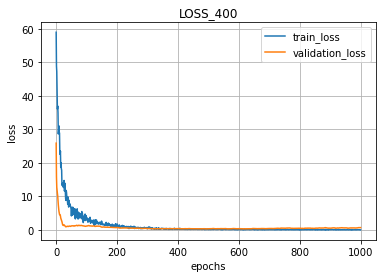

In [180]:
import matplotlib.pyplot as plt
plt.title("LOSS_400")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")

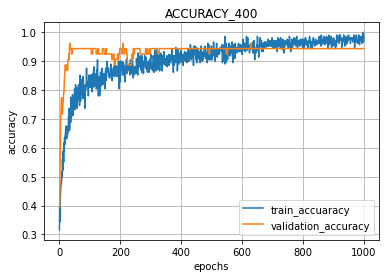

In [181]:
plt.title("ACCURACY_400")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuaracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best")

In [182]:
pred = model.predict(test_target)

6/6 [==============================] - 3s 1ms/step


In [185]:
np.argmax(pred, axis=1) 

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [186]:
le.classes_

array(['A', 'B', 'C'], dtype=object)

## labeling을 count값으로 바꿔주기(각 SNP에서 해당 서열이 몇 번이나 나오는지)

- 각 SNP에서의 서열에 가중치를 두기 위해

In [69]:
train_distance.head()
train.head()
count_snp_train.head()

,SNP,sequence,count,rank
0,SNP_01,G G,141,3
1,SNP_01,A G,71,2
2,SNP_01,A A,50,1
3,SNP_02,G G,108,3
4,SNP_02,A G,97,2


In [80]:
## train의 sequence 각 count값으로 바꿔주기

train_seq_cnt = train.copy()

for cnt in range(len(count_snp_train)):
    if cnt%3 == 0:
        for seq in range(len(train_seq_cnt)):
            value = count_snp_train[(count_snp_train["SNP"]==count_snp_train["SNP"][cnt])&(count_snp_train["sequence"]==train_seq_cnt[count_snp_train["SNP"][cnt]][seq])]["count"].values[0]
            train_seq_cnt[count_snp_train["SNP"][cnt]][seq]=value
    else:
        pass
        
train_seq_cnt.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,141,97,122,93,86,...,163,79,182,151,96,136,52,185,107,B
1,TRAIN_001,0,0,0,2,71,97,92,120,94,...,163,96,182,68,83,73,115,185,107,C
2,TRAIN_002,0,0,0,2,141,108,122,93,82,...,163,96,56,68,83,136,52,185,107,B
3,TRAIN_003,0,0,0,1,50,108,122,93,94,...,51,87,24,68,83,53,115,185,55,A
4,TRAIN_004,0,0,0,2,141,108,48,120,82,...,163,87,182,151,83,136,95,185,100,C


In [84]:
train_target5 = pd.concat([train_seq_cnt[train_seq_cnt.columns[4:-1]],train_distance[train_distance.columns[-6:]]], axis=1)
train_target5.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,2,141,97,122,93,86,61,163,79,182,...,136,52,185,107,8,3,2,1,1,0
1,2,71,97,92,120,94,122,163,96,182,...,73,115,185,107,7,1,4,2,1,0
2,2,141,108,122,93,82,79,163,96,56,...,136,52,185,107,7,3,1,3,0,1
3,1,50,108,122,93,94,79,51,87,24,...,53,115,185,55,5,8,1,1,0,0
4,2,141,108,48,120,82,61,163,87,182,...,136,95,185,100,8,3,1,1,0,2


In [87]:
test_distance.head()
test.head()
count_snp_test.head()

,SNP,sequence,count,rank
0,SNP_01,G G,84,3
1,SNP_01,A G,52,2
2,SNP_01,A A,39,1
3,SNP_02,G G,81,3
4,SNP_02,A G,57,2


In [88]:
## test의 sequence 각 count값으로 바꿔주기

test_seq_cnt = test.copy()

for cnt in range(len(count_snp_test)):
    if cnt%3 == 0:
        for seq in range(len(test_seq_cnt)):
            value = count_snp_test[(count_snp_test["SNP"]==count_snp_test["SNP"][cnt])&(count_snp_test["sequence"]==test_seq_cnt[count_snp_test["SNP"][cnt]][seq])]["count"].values[0]
            test_seq_cnt[count_snp_test["SNP"][cnt]][seq]=value
    else:
        pass
        
test_seq_cnt.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,52,81,82,76,52,80,34,52,43,47,68,48,76,33,68
1,TEST_001,0,0,0,2,84,57,25,35,62,48,101,64,120,97,68,93,41,120,68
2,TEST_002,0,0,0,2,84,57,82,64,61,80,101,64,120,47,41,48,76,120,39
3,TEST_003,0,0,0,2,84,57,68,64,62,48,101,64,120,97,41,48,58,120,68
4,TEST_004,0,0,0,1,39,81,82,35,52,47,34,64,12,47,66,48,76,120,39


In [89]:
test_target5 = pd.concat([test_seq_cnt[test_seq_cnt.columns[4:]],test_distance[train_distance.columns[-6:]]], axis=1)
test_target5.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,1,52,81,82,76,52,80,34,52,43,...,48,76,33,68,2,3,4,5,1,0
1,2,84,57,25,35,62,48,101,64,120,...,93,41,120,68,8,3,2,0,0,2
2,2,84,57,82,64,61,80,101,64,120,...,48,76,120,39,7,3,3,1,1,0
3,2,84,57,68,64,62,48,101,64,120,...,48,58,120,68,8,2,2,1,1,1
4,1,39,81,82,35,52,47,34,64,12,...,48,76,120,39,5,8,1,1,0,0


In [91]:
train_target5_scale = train_target5.copy()
test_target5_scale = test_target5.copy()

columns = train_target5.columns[1:-6]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for i in columns:
    scaler.fit(train_target5_scale[i].values.reshape(-1,1))
    train_target5_scale[i] = scaler.transform(train_target5_scale[i].values.reshape(-1,1))
    test_target5_scale[i] = scaler.transform(test_target5_scale[i].values.reshape(-1,1))
    
train_target5_scale.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
0,2,0.911849,0.213643,0.886307,-0.158796,-0.321419,-1.291935,0.779225,-1.279940,0.657482,...,0.945286,-1.856662,0.640524,0.677943,8,3,2,1,1,0
1,2,-0.844801,0.213643,-0.217364,0.877482,1.267482,1.037454,0.779225,1.168880,0.657482,...,-0.788754,0.848198,0.640524,0.677943,7,1,4,2,1,0
2,2,0.911849,0.777488,0.886307,-0.158796,-1.115869,-0.604574,0.779225,1.168880,-1.343329,...,0.945286,-1.856662,0.640524,0.677943,7,3,1,3,0,1
3,1,-1.371796,0.777488,0.886307,-0.158796,1.267482,-0.604574,-1.256528,-0.127554,-1.851471,...,-1.339243,0.848198,0.640524,-1.916523,5,8,1,1,0,0
4,2,0.911849,0.777488,-1.836082,0.877482,-1.115869,-1.291935,0.779225,-0.127554,0.657482,...,0.945286,-0.010488,0.640524,0.328688,8,3,1,1,0,2


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_target5_scale, train["class"], test_size=0.2, stratify=train["class"], random_state=42)

In [94]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_val)

score_logistic = f1_score(y_val, logistic_pred, average="macro")
score_logistic

0.8916666666666666

In [101]:
logistic = LogisticRegression(C=0.01, max_iter=1000)
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_val)

score_logistic = f1_score(y_val, logistic_pred, average="macro")
score_logistic

0.9107755662319835

In [102]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train, y_train)
random_pred = random.predict(X_val)

score_random = f1_score(y_val, random_pred, average="macro")
score_random

0.9085151301900071

In [108]:
random = RandomForestClassifier(n_estimators=300, max_depth=3)
random.fit(X_train, y_train)
random_pred = random.predict(X_val)

score_random = f1_score(y_val, random_pred, average="macro")
score_random

0.9257142857142857

In [109]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier([("logistic",logistic),("random", random)], voting="soft")
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_val)

score_voting = f1_score(y_val, voting_pred, average="macro")
score_voting

0.9257142857142857

In [110]:
pred = random.predict(test_target5_scale)
pred

array(['A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B',
       'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B',
       'B', 'A', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'B', 'C', 'B', 'B',
       'C', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'A', 'B',
       'A', 'B', 'B', 'B', 'B', 'A', 'B', 'C', 'A', 'B', 'B', 'B', 'B',
       'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'C', 'B',
       'B', 'B', 'C', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'C', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'B',
       'A', 'A', 'B', 'B', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'A', 'A',
       'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'A', 'A', 'B', 'B', 'B', 'C', 'A', 'A', 'B', 'A', 'A', 'A', 'C',
       'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'B', 'A',
       'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B',
       'A', 'B', 'B', 'B', 'B', 'B'], dtype=object)

#### 정규화 하지 않은 값으로 확인해보기

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_target5, train["class"], test_size=0.2, stratify=train["class"], random_state=42)

In [112]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_val)

score_logistic = f1_score(y_val, logistic_pred, average="macro")
score_logistic

0.9293478260869565

In [122]:
logistic = LogisticRegression(C=20, max_iter=1000)
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_val)

score_logistic = f1_score(y_val, logistic_pred, average="macro")
score_logistic

0.9821551132463967

In [138]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train, y_train)
random_pred = random.predict(X_val)

score_random = f1_score(y_val, random_pred, average="macro")
score_random

0.9277777777777777

In [134]:
random = RandomForestClassifier(n_estimators=300, max_depth=4)
random.fit(X_train, y_train)
random_pred = random.predict(X_val)

score_random = f1_score(y_val, random_pred, average="macro")
score_random

0.9257142857142857

In [139]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier([("logistic",logistic),("random", random)], voting="soft")
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_val)

score_voting = f1_score(y_val, voting_pred, average="macro")
score_voting

0.9821551132463967

In [146]:
pred2 = logistic.predict(test_target5)
pred2

array(['A', 'B', 'C', 'B', 'A', 'C', 'C', 'B', 'A', 'A', 'C', 'B', 'C',
       'A', 'C', 'B', 'A', 'C', 'B', 'B', 'B', 'B', 'B', 'A', 'C', 'C',
       'C', 'A', 'A', 'C', 'A', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'C',
       'C', 'A', 'B', 'C', 'C', 'C', 'B', 'B', 'C', 'B', 'C', 'A', 'C',
       'A', 'C', 'B', 'B', 'B', 'A', 'C', 'C', 'C', 'B', 'C', 'C', 'C',
       'A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'A', 'C', 'C', 'C', 'B',
       'B', 'B', 'C', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'A', 'C',
       'B', 'C', 'C', 'C', 'C', 'A', 'B', 'A', 'C', 'A', 'C', 'B', 'B',
       'A', 'A', 'C', 'C', 'A', 'B', 'C', 'C', 'C', 'B', 'B', 'A', 'A',
       'B', 'B', 'B', 'A', 'B', 'C', 'C', 'C', 'B', 'C', 'B', 'A', 'C',
       'A', 'A', 'C', 'B', 'C', 'C', 'A', 'A', 'C', 'A', 'A', 'A', 'C',
       'B', 'C', 'B', 'A', 'C', 'C', 'A', 'A', 'C', 'A', 'B', 'B', 'A',
       'A', 'C', 'C', 'A', 'B', 'C', 'C', 'C', 'A', 'A', 'C', 'B', 'C',
       'A', 'B', 'C', 'C', 'C', 'C'], dtype=object)

In [147]:
result["class"]=pred2
result.head()

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,B
4,TEST_004,A


In [148]:
result.to_csv("data/submission17.csv", index=False)

In [154]:
# 오답 체크

check_answer = pd.DataFrame({'answer':y_val, "predict":voting_pred})
check_answer = check_answer.reset_index()

checking = []
for i in range(len(check_answer)):
    if check_answer["answer"][i]==check_answer["predict"][i]:
        checking.append(True)
    else:
        checking.append(False)
        
check_answer["T/F"] = checking
check_answer.head()

,index,answer,predict,T/F
0,15,A,A,True
1,139,B,B,True
2,204,A,A,True
3,114,B,B,True
4,16,A,A,True


In [155]:
check_answer["T/F"].value_counts()

True     52
False     1
Name: T/F, dtype: int64

In [159]:
wrong_index = check_answer[check_answer["T/F"]==False]["index"].values[0]

display(train.iloc[[wrong_index]])
display(train_target5.iloc[[wrong_index]])

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_12,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C
4,2,141,108,48,120,82,61,163,87,182,...,136,95,185,100,8,3,1,1,0,2


In [160]:
check_answer[check_answer["index"]==wrong_index] # C를 B로 잘못 인식

,index,answer,predict,T/F
41,4,C,B,False


In [164]:
warning_columns = list(train_target5[(train_target5["A A"]==8)&(train_target5["G G"]==3)].index)
warning_columns

[0, 4, 105, 122, 143, 192, 196, 206, 218, 221]

In [170]:
train_distance.iloc[warning_columns,:]

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,134.1092,31.1567,0.0000,77.8749,80.5015,...,0.0000,0.0,0.00000,1,8,3,2,1,1,0
4,TRAIN_004,0,0,0,2,134.1092,62.3134,136.5784,0.0000,161.0030,...,63.4181,0.0,1.78774,2,8,3,1,1,0,2
105,TRAIN_105,0,0,0,2,67.0546,62.3134,68.2892,0.0000,0.0000,...,0.0000,0.0,0.00000,1,8,3,2,1,1,0
122,TRAIN_122,0,0,0,2,134.1092,0.0000,0.0000,0.0000,80.5015,...,63.4181,0.0,1.78774,2,8,3,1,2,1,0
143,TRAIN_143,0,0,0,2,67.0546,31.1567,0.0000,155.7498,161.0030,...,0.0000,0.0,0.00000,1,8,3,3,0,0,1
192,TRAIN_192,0,0,0,2,134.1092,31.1567,0.0000,0.0000,161.0030,...,63.4181,0.0,0.00000,1,8,3,3,0,0,1
196,TRAIN_196,0,0,0,2,67.0546,0.0000,68.2892,77.8749,80.5015,...,0.0000,0.0,0.00000,1,8,3,1,1,2,0
206,TRAIN_206,0,0,0,2,134.1092,31.1567,68.2892,0.0000,0.0000,...,63.4181,0.0,0.00000,2,8,3,2,1,1,0
218,TRAIN_218,0,0,0,2,134.1092,31.1567,0.0000,0.0000,80.5015,...,126.8362,0.0,1.78774,2,8,3,1,2,1,0
221,TRAIN_221,0,0,0,2,67.0546,31.1567,136.5784,0.0000,161.0030,...,0.0000,0.0,0.00000,1,8,3,2,0,0,2


### "AA"가 8이고 "GG"가 3인 서열에서 예측을 자꾸 틀리는데 class분류가 "GA","CA","CC"의 합이 3이냐 아니냐로 나눌 수 있을 것 같다

In [210]:
train_distance["GCA"] = train_distance["G A"]+train_distance["C A"]+train_distance["C C"]
train_distance.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C,GCA
0,TRAIN_000,0,0,0,2,134.1092,31.1567,0.0000,77.8749,80.5015,...,0.0,0.00000,1,8,3,2,1,1,0,2
1,TRAIN_001,0,0,0,2,67.0546,31.1567,68.2892,0.0000,0.0000,...,0.0,0.00000,2,7,1,4,2,1,0,3
2,TRAIN_002,0,0,0,2,134.1092,62.3134,0.0000,77.8749,161.0030,...,0.0,0.00000,1,7,3,1,3,0,1,4
3,TRAIN_003,0,0,0,1,0.0000,62.3134,0.0000,77.8749,0.0000,...,0.0,3.57548,0,5,8,1,1,0,0,1
4,TRAIN_004,0,0,0,2,134.1092,62.3134,136.5784,0.0000,161.0030,...,0.0,1.78774,2,8,3,1,1,0,2,3


In [175]:
for i in range(len(train_distance)):
    if (train_distance["A A"][i]==8 and train_distance["G G"][i]==3):
        train_distance["GCA"][i] = train_distance["GCA"][i]
    else :
        train_distance["GCA"][i]=0

train_distance.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C,GCA
0,TRAIN_000,0,0,0,2,134.1092,31.1567,0.0000,77.8749,80.5015,...,0.0,0.00000,1,8,3,2,1,1,0,2
1,TRAIN_001,0,0,0,2,67.0546,31.1567,68.2892,0.0000,0.0000,...,0.0,0.00000,2,7,1,4,2,1,0,0
2,TRAIN_002,0,0,0,2,134.1092,62.3134,0.0000,77.8749,161.0030,...,0.0,0.00000,1,7,3,1,3,0,1,0
3,TRAIN_003,0,0,0,1,0.0000,62.3134,0.0000,77.8749,0.0000,...,0.0,3.57548,0,5,8,1,1,0,0,0
4,TRAIN_004,0,0,0,2,134.1092,62.3134,136.5784,0.0000,161.0030,...,0.0,1.78774,2,8,3,1,1,0,2,3


In [211]:
test_distance["GCA"] = test_distance["G A"]+test_distance["C A"]+test_distance["C C"]

for i in range(len(test_distance)):
    if (test_distance["A A"][i]==8 and test_distance["G G"][i]==3):
        test_distance["GCA"][i] = test_distance["GCA"][i]
    else :
        test_distance["GCA"][i]=0

test_distance.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C,GCA
0,TEST_000,0,0,0,1,67.0546,62.3134,0.0000,77.8749,0.0000,...,126.8362,66.8197,1.78774,2,3,4,5,1,0,6
1,TEST_001,0,0,0,2,134.1092,31.1567,136.5784,155.7498,161.0030,...,0.0000,0.0000,0.00000,8,3,2,0,0,2,2
2,TEST_002,0,0,0,2,134.1092,31.1567,0.0000,0.0000,80.5015,...,126.8362,0.0000,3.57548,7,3,3,1,1,0,2
3,TEST_003,0,0,0,2,134.1092,31.1567,68.2892,0.0000,161.0030,...,63.4181,0.0000,0.00000,8,2,2,1,1,1,3
4,TEST_004,0,0,0,1,0.0000,62.3134,0.0000,155.7498,0.0000,...,126.8362,0.0000,3.57548,5,8,1,1,0,0,1


In [212]:
distance_target = train_distance[train_distance.columns[4:]]
distance_target = distance_target.drop("class", axis=1)
distance_target.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C,GCA
0,2,134.1092,31.1567,0.0000,77.8749,80.5015,0.0000,0.00,165.3712,0.000,...,0.0000,0.0,0.00000,8,3,2,1,1,0,2
1,2,67.0546,31.1567,68.2892,0.0000,0.0000,80.5954,0.00,82.6856,0.000,...,126.8362,0.0,0.00000,7,1,4,2,1,0,3
2,2,134.1092,62.3134,0.0000,77.8749,161.0030,161.1908,0.00,82.6856,86.874,...,0.0000,0.0,0.00000,7,3,1,3,0,1,4
3,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,173.748,...,126.8362,0.0,3.57548,5,8,1,1,0,0,1
4,2,134.1092,62.3134,136.5784,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,63.4181,0.0,1.78774,8,3,1,1,0,2,3


In [213]:
distance_test = test_distance[test_distance.columns[4:]]
distance_test.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C,GCA
0,1,67.0546,62.3134,0.0000,77.8749,0.0000,80.5954,161.56,82.6856,86.874,...,126.8362,66.8197,1.78774,2,3,4,5,1,0,6
1,2,134.1092,31.1567,136.5784,155.7498,161.0030,0.0000,0.00,0.0000,0.000,...,0.0000,0.0000,0.00000,8,3,2,0,0,2,2
2,2,134.1092,31.1567,0.0000,0.0000,80.5015,80.5954,0.00,0.0000,0.000,...,126.8362,0.0000,3.57548,7,3,3,1,1,0,2
3,2,134.1092,31.1567,68.2892,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,63.4181,0.0000,0.00000,8,2,2,1,1,1,3
4,1,0.0000,62.3134,0.0000,155.7498,0.0000,161.1908,161.56,0.0000,173.748,...,126.8362,0.0000,3.57548,5,8,1,1,0,0,1


In [217]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(distance_target, train["class"], test_size = 0.2, stratify = train["class"], random_state=42)
X_train.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C,GCA
123,1,67.0546,31.1567,0.0000,155.7498,0.000,161.1908,161.56,0.0000,173.748,...,126.8362,66.8197,1.78774,4,6,2,2,1,0,3
189,2,134.1092,0.0000,68.2892,0.0000,0.000,80.5954,0.00,82.6856,0.000,...,63.4181,0.0000,0.00000,9,1,3,1,1,0,2
49,1,0.0000,62.3134,0.0000,77.8749,0.000,161.1908,161.56,0.0000,86.874,...,126.8362,66.8197,3.57548,5,6,0,3,1,0,4
198,2,134.1092,31.1567,68.2892,0.0000,161.003,0.0000,0.00,165.3712,86.874,...,63.4181,0.0000,1.78774,5,4,2,2,1,1,4
29,1,67.0546,62.3134,0.0000,77.8749,0.000,161.1908,161.56,0.0000,86.874,...,126.8362,0.0000,3.57548,5,7,1,2,0,0,2


In [218]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_val)

logistic_score = f1_score(y_val, logistic_pred, average="macro")
logistic_score
# 0.9824915824915825

0.9821551132463967

In [222]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=0.05)
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_val)

logistic_score = f1_score(y_val, logistic_pred, average="macro")
logistic_score

0.9821551132463967

In [223]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train, y_train)
pred_random = random.predict(X_val)

random_score = f1_score(y_val, pred_random, average='macro')
random_score

0.9257142857142857

In [236]:
random = RandomForestClassifier(n_estimators=300, max_depth = 3)
random.fit(X_train, y_train)
pred_random = random.predict(X_val)

random_score = f1_score(y_val, pred_random, average='macro')
random_score

0.9257142857142857

In [237]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier([("logistic", logistic),("random",random)], voting="soft")
voting.fit(X_train, y_train)
pred_voting = voting.predict(X_val)

voting_score = f1_score(y_val, pred_voting, average="macro")
voting_score

0.9638888888888889

In [240]:
pred_GCA = voting.predict(distance_test)
pred_GCA

array(['A', 'B', 'C', 'C', 'A', 'B', 'C', 'B', 'A', 'A', 'C', 'B', 'B',
       'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B',
       'B', 'A', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'B', 'C', 'B', 'B',
       'C', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'C', 'A', 'B',
       'A', 'B', 'B', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'C', 'C',
       'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'C', 'B', 'C', 'B',
       'B', 'B', 'C', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'A', 'B',
       'B', 'C', 'B', 'B', 'C', 'A', 'B', 'A', 'C', 'A', 'B', 'B', 'B',
       'A', 'A', 'C', 'B', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'A', 'A',
       'C', 'B', 'C', 'A', 'B', 'B', 'C', 'C', 'B', 'C', 'B', 'A', 'B',
       'A', 'A', 'B', 'B', 'B', 'C', 'A', 'A', 'B', 'A', 'A', 'A', 'C',
       'B', 'B', 'B', 'A', 'B', 'C', 'A', 'A', 'B', 'A', 'B', 'B', 'A',
       'A', 'B', 'C', 'A', 'B', 'C', 'C', 'B', 'A', 'A', 'C', 'B', 'B',
       'A', 'B', 'C', 'C', 'B', 'B'], dtype=object)

In [241]:
pred_GCA_logistic = logistic.predict(distance_test)
pred_GCA_logistic

array(['A', 'B', 'C', 'C', 'A', 'B', 'C', 'B', 'A', 'A', 'C', 'B', 'B',
       'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B',
       'B', 'A', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'B', 'C', 'B', 'B',
       'C', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'C', 'A', 'B',
       'A', 'B', 'B', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'C', 'C',
       'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'C', 'B', 'C', 'B',
       'B', 'B', 'C', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'A', 'B',
       'B', 'C', 'B', 'B', 'C', 'A', 'B', 'A', 'C', 'A', 'B', 'B', 'B',
       'A', 'A', 'C', 'B', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'A', 'A',
       'C', 'B', 'C', 'A', 'B', 'B', 'C', 'C', 'B', 'C', 'B', 'A', 'B',
       'A', 'A', 'B', 'B', 'B', 'C', 'A', 'A', 'B', 'A', 'A', 'A', 'C',
       'B', 'B', 'B', 'A', 'B', 'C', 'A', 'A', 'B', 'A', 'B', 'B', 'A',
       'A', 'B', 'C', 'A', 'B', 'C', 'C', 'B', 'A', 'A', 'C', 'B', 'B',
       'A', 'B', 'C', 'C', 'B', 'B'], dtype=object)

In [243]:
result["class"]=pred_GCA
result["class"]

0      A
1      B
2      C
3      C
4      A
      ..
170    B
171    C
172    C
173    B
174    B
Name: class, Length: 175, dtype: object

In [244]:
result.to_csv("data/submission18.csv", index=False)

In [247]:
distance_target.to_csv("data/distance_targetd_1.csv", index=False)
distance_test.to_csv("data/distance_testd_1.csv", index=False)

## 정규화 해서 support vector machine 써보기

In [5]:
import pandas as pd
distance_target = pd.read_csv("data/distance_targetd_1.csv")
distance_test = pd.read_csv("data/distance_testd_1.csv")

display(distance_target.head())
display(distance_test.head())

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C,GCA
0,2,134.1092,31.1567,0.0000,77.8749,80.5015,0.0000,0.00,165.3712,0.000,...,0.0000,0.0,0.00000,8,3,2,1,1,0,2
1,2,67.0546,31.1567,68.2892,0.0000,0.0000,80.5954,0.00,82.6856,0.000,...,126.8362,0.0,0.00000,7,1,4,2,1,0,3
2,2,134.1092,62.3134,0.0000,77.8749,161.0030,161.1908,0.00,82.6856,86.874,...,0.0000,0.0,0.00000,7,3,1,3,0,1,4
3,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,173.748,...,126.8362,0.0,3.57548,5,8,1,1,0,0,1
4,2,134.1092,62.3134,136.5784,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,63.4181,0.0,1.78774,8,3,1,1,0,2,3


,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C,GCA
0,1,67.0546,62.3134,0.0000,77.8749,0.0000,80.5954,161.56,82.6856,86.874,...,126.8362,66.8197,1.78774,2,3,4,5,1,0,6
1,2,134.1092,31.1567,136.5784,155.7498,161.0030,0.0000,0.00,0.0000,0.000,...,0.0000,0.0000,0.00000,8,3,2,0,0,2,2
2,2,134.1092,31.1567,0.0000,0.0000,80.5015,80.5954,0.00,0.0000,0.000,...,126.8362,0.0000,3.57548,7,3,3,1,1,0,2
3,2,134.1092,31.1567,68.2892,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,63.4181,0.0000,0.00000,8,2,2,1,1,1,3
4,1,0.0000,62.3134,0.0000,155.7498,0.0000,161.1908,161.56,0.0000,173.748,...,126.8362,0.0000,3.57548,5,8,1,1,0,0,1


In [7]:
train = pd.read_csv("data/train.csv")

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(distance_target)
distance_target_scale = scaler.transform(distance_target)
distance_test_scale = scaler.transform(distance_test)
distance_target_scale

array([[ 0.59792387,  0.83677879, -0.2530184 , ...,  0.16606297,
        -0.91960335, -1.03788606],
       [ 0.59792387, -0.44530333, -0.2530184 , ...,  0.16606297,
        -0.91960335, -0.20630763],
       [ 0.59792387,  0.83677879,  1.04680163, ..., -1.28422028,
         0.65514225,  0.62527081],
       ...,
       [-1.67245372, -0.44530333,  1.04680163, ...,  0.16606297,
        -0.91960335,  0.62527081],
       [-1.67245372, -1.72738546,  1.04680163, ...,  0.16606297,
        -0.91960335,  0.62527081],
       [ 0.59792387,  0.83677879, -0.2530184 , ...,  0.16606297,
         0.65514225, -0.20630763]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(distance_target_scale, train["class"], test_size = 0.2, stratify=train["class"], random_state=42)

In [17]:
from sklearn.svm import SVC

model = SVC(kernel = "rbf", gamma="auto", C=10)
model.fit(X_train, y_train)
prediction = model.predict(X_val)

from sklearn.metrics import f1_score
svc_score = f1_score(y_val, prediction, average="macro")
svc_score

# SVC(kernel = "rbf", gamma="scale", C=10) , 0.9821551132463967

0.9821551132463967

In [19]:
pd.DataFrame({"prediction":prediction, "answer":y_val})

,prediction,answer
15,A,A
139,B,B
204,A,A
114,B,B
16,A,A
178,C,C
79,A,A
82,C,C
94,B,B
146,C,C


In [20]:
pred = model.predict(distance_test_scale)

In [21]:
pred

array(['A', 'B', 'C', 'B', 'A', 'B', 'C', 'B', 'A', 'A', 'C', 'B', 'C',
       'A', 'B', 'B', 'A', 'B', 'B', 'C', 'B', 'B', 'B', 'A', 'B', 'B',
       'B', 'A', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'B', 'C', 'B', 'B',
       'C', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'C', 'A', 'B',
       'A', 'B', 'B', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'C', 'C',
       'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'C', 'B', 'C', 'B',
       'B', 'B', 'C', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'A', 'B',
       'B', 'C', 'B', 'B', 'C', 'A', 'B', 'A', 'C', 'A', 'B', 'B', 'C',
       'A', 'A', 'C', 'B', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'A', 'A',
       'B', 'B', 'C', 'A', 'B', 'C', 'C', 'C', 'B', 'B', 'B', 'A', 'B',
       'A', 'A', 'B', 'B', 'B', 'C', 'A', 'A', 'B', 'A', 'A', 'A', 'C',
       'B', 'B', 'B', 'A', 'B', 'C', 'A', 'A', 'B', 'A', 'B', 'B', 'A',
       'A', 'B', 'C', 'A', 'B', 'C', 'C', 'B', 'A', 'A', 'C', 'B', 'B',
       'A', 'B', 'C', 'C', 'B', 'B'], dtype=object)

In [23]:
logistic = ['A', 'B', 'C', 'C', 'A', 'B', 'C', 'B', 'A', 'A', 'C', 'B', 'B',
       'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B',
       'B', 'A', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'B', 'C', 'B', 'B',
       'C', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'C', 'A', 'B',
       'A', 'B', 'B', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'C', 'C',
       'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'C', 'B', 'C', 'B',
       'B', 'B', 'C', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'A', 'B',
       'B', 'C', 'B', 'B', 'C', 'A', 'B', 'A', 'C', 'A', 'B', 'B', 'B',
       'A', 'A', 'C', 'B', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'A', 'A',
       'C', 'B', 'C', 'A', 'B', 'B', 'C', 'C', 'B', 'C', 'B', 'A', 'B',
       'A', 'A', 'B', 'B', 'B', 'C', 'A', 'A', 'B', 'A', 'A', 'A', 'C',
       'B', 'B', 'B', 'A', 'B', 'C', 'A', 'A', 'B', 'A', 'B', 'B', 'A',
       'A', 'B', 'C', 'A', 'B', 'C', 'C', 'B', 'A', 'A', 'C', 'B', 'B',
       'A', 'B', 'C', 'C', 'B', 'B']

svc = pred

check = pd.DataFrame({"logistic":logistic, "svc":svc})

wrong_right = []
for i in range(len(check)):
    if check["logistic"][i]==check["svc"][i]:
        wrong_right.append(True)
    else:
        wrong_right.append(False)
        
check["checking"]=wrong_right
check[check["checking"]==False]

,logistic,svc,checking
3,C,B,False
12,B,C,False
19,B,C,False
103,B,C,False
117,C,B,False
122,B,C,False
126,C,B,False


In [27]:
distance_test.iloc[list(check[check["checking"]==False].index),:]

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_13,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C,GCA
3,2,134.1092,31.1567,68.2892,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,63.4181,0.0000,0.00000,8,2,2,1,1,1,3
12,2,134.1092,62.3134,68.2892,77.8749,0.0000,0.0000,0.00,82.6856,0.000,...,63.4181,0.0000,1.78774,6,3,1,4,1,0,5
19,2,134.1092,31.1567,68.2892,0.0000,80.5015,80.5954,0.00,165.3712,0.000,...,0.0000,0.0000,3.57548,7,3,3,0,2,0,2
103,2,134.1092,31.1567,68.2892,0.0000,80.5015,0.0000,0.00,82.6856,86.874,...,126.8362,0.0000,1.78774,6,2,2,3,2,0,5
117,2,134.1092,31.1567,136.5784,0.0000,161.0030,80.5954,80.78,82.6856,0.000,...,63.4181,0.0000,1.78774,3,1,5,4,0,2,6
122,2,134.1092,62.3134,68.2892,0.0000,161.0030,0.0000,0.00,165.3712,0.000,...,63.4181,0.0000,3.57548,6,5,2,0,1,1,2
126,2,134.1092,0.0000,136.5784,77.8749,80.5015,161.1908,80.78,165.3712,0.000,...,126.8362,66.8197,0.00000,4,6,0,2,2,1,5


In [29]:
result = pd.read_csv("data/sample_submission.csv")
result.head()

,id,class
0,TEST_000,A
1,TEST_001,A
2,TEST_002,A
3,TEST_003,A
4,TEST_004,A


In [30]:
result["class"]=pred
result.to_csv("data/submission19_svc.csv", index=False)

### snp 서열 각각이 중요한듯

- minor, major를 알면 좋겠다
- https://koreascience.kr/article/JAKO202126758022529.pdf

In [64]:
distance_target_snp = distance_target.copy()

distance_target_snp["count"] = 0
distance_target_snp.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C,GCA,count
0,2,134.1092,31.1567,0.0000,77.8749,80.5015,0.0000,0.00,165.3712,0.000,...,0.0,0.00000,8,3,2,1,1,0,2,0
1,2,67.0546,31.1567,68.2892,0.0000,0.0000,80.5954,0.00,82.6856,0.000,...,0.0,0.00000,7,1,4,2,1,0,3,0
2,2,134.1092,62.3134,0.0000,77.8749,161.0030,161.1908,0.00,82.6856,86.874,...,0.0,0.00000,7,3,1,3,0,1,4,0
3,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,173.748,...,0.0,3.57548,5,8,1,1,0,0,1,0
4,2,134.1092,62.3134,136.5784,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,0.0,1.78774,8,3,1,1,0,2,3,0


In [75]:
snp_columns = distance_target.columns[-7:-1]

for i in range(len(distance_target)):
    snp_list = []
    for column in snp_columns:
        count = int(distance_target[column][i])
        snp = column.split(" ")
        for replicate in range(count):
            snp_list.append(snp[0])
            snp_list.append(snp[1])
        distance_target_snp["count"][i] = snp_list
        
            
distance_target_snp.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_14,SNP_15,A A,G G,A G,G A,C A,C C,GCA,count
0,2,134.1092,31.1567,0.0000,77.8749,80.5015,0.0000,0.00,165.3712,0.000,...,0.0,0.00000,8,3,2,1,1,0,2,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ..."
1,2,67.0546,31.1567,68.2892,0.0000,0.0000,80.5954,0.00,82.6856,0.000,...,0.0,0.00000,7,1,4,2,1,0,3,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, G, ..."
2,2,134.1092,62.3134,0.0000,77.8749,161.0030,161.1908,0.00,82.6856,86.874,...,0.0,0.00000,7,3,1,3,0,1,4,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, G, ..."
3,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,173.748,...,0.0,3.57548,5,8,1,1,0,0,1,"[A, A, A, A, A, A, A, A, A, A, G, G, G, G, G, ..."
4,2,134.1092,62.3134,136.5784,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,0.0,1.78774,8,3,1,1,0,2,3,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ..."


In [81]:
from collections import Counter
Counter(distance_target_snp["count"][0])["A"]

20

In [78]:
distance_target_snp["A"]=0
distance_target_snp["G"]=0
distance_target_snp["C"]=0

distance_target_snp.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,G G,A G,G A,C A,C C,GCA,count,A,G,C
0,2,134.1092,31.1567,0.0000,77.8749,80.5015,0.0000,0.00,165.3712,0.000,...,3,2,1,1,0,2,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...",0,0,0
1,2,67.0546,31.1567,68.2892,0.0000,0.0000,80.5954,0.00,82.6856,0.000,...,1,4,2,1,0,3,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, G, ...",0,0,0
2,2,134.1092,62.3134,0.0000,77.8749,161.0030,161.1908,0.00,82.6856,86.874,...,3,1,3,0,1,4,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, G, ...",0,0,0
3,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,173.748,...,8,1,1,0,0,1,"[A, A, A, A, A, A, A, A, A, A, G, G, G, G, G, ...",0,0,0
4,2,134.1092,62.3134,136.5784,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,3,1,1,0,2,3,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...",0,0,0


In [80]:
count_columns = distance_target_snp.columns[-3:]

In [82]:
for i in range(len(distance_target_snp)):
    counter_dict = Counter(distance_target_snp["count"][i])
    for column in count_columns:
        distance_target_snp[column][i] = counter_dict[column]
        
distance_target_snp.head()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2876\1883653788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_target_snp[column][i] = counter_dict[column]


,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,G G,A G,G A,C A,C C,GCA,count,A,G,C
0,2,134.1092,31.1567,0.0000,77.8749,80.5015,0.0000,0.00,165.3712,0.000,...,3,2,1,1,0,2,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...",20,9,1
1,2,67.0546,31.1567,68.2892,0.0000,0.0000,80.5954,0.00,82.6856,0.000,...,1,4,2,1,0,3,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, G, ...",21,8,1
2,2,134.1092,62.3134,0.0000,77.8749,161.0030,161.1908,0.00,82.6856,86.874,...,3,1,3,0,1,4,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, G, ...",18,10,2
3,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,173.748,...,8,1,1,0,0,1,"[A, A, A, A, A, A, A, A, A, A, G, G, G, G, G, ...",12,18,0
4,2,134.1092,62.3134,136.5784,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,3,1,1,0,2,3,"[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...",18,8,4


In [84]:
distance_target_snp = distance_target_snp.drop("count", axis=1)
distance_target_snp.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,A A,G G,A G,G A,C A,C C,GCA,A,G,C
0,2,134.1092,31.1567,0.0000,77.8749,80.5015,0.0000,0.00,165.3712,0.000,...,8,3,2,1,1,0,2,20,9,1
1,2,67.0546,31.1567,68.2892,0.0000,0.0000,80.5954,0.00,82.6856,0.000,...,7,1,4,2,1,0,3,21,8,1
2,2,134.1092,62.3134,0.0000,77.8749,161.0030,161.1908,0.00,82.6856,86.874,...,7,3,1,3,0,1,4,18,10,2
3,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,173.748,...,5,8,1,1,0,0,1,12,18,0
4,2,134.1092,62.3134,136.5784,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,8,3,1,1,0,2,3,18,8,4


### genetic distance 뿐만아니라 염색체 정보도 중요한 듯

- https://koreascience.kr/article/JAKO202126758022529.pdf

In [89]:
snp_info = pd.read_csv("data/snp_info.csv")
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train_rank = pd.read_csv("data/train_seq.csv")
test_rank = pd.read_csv("data/test_seq.csv")
snp_info.head()

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.0546,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.1567,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.2892,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.8749,53826064
4,SNP_05,BovineHD0600017032,6,80.5015,61779512


In [95]:
# rank에 해당 염색체 정보 곱해서 염색체 정보값이 입력되도록

columns = train_rank.columns[5:-7]
for column in columns:
    train_rank[column] = train_rank[column]*snp_info[snp_info["SNP_id"]==column]["chrom"].values[0]
    
train_rank.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13,SNP_14,SNP_15,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,6,12,18,12,12,...,9,27,30,B,8,3,-0.074778,-0.741157,0.166063,-0.919603
1,TRAIN_001,0,0,0,2,4,12,12,18,18,...,27,27,30,C,7,1,1.492561,0.210721,0.166063,-0.919603
2,TRAIN_002,0,0,0,2,6,18,18,12,6,...,9,27,30,B,7,3,-0.858447,1.162599,-1.284220,0.655142
3,TRAIN_003,0,0,0,1,2,18,18,12,18,...,27,27,10,A,5,8,-0.858447,-0.741157,-1.284220,-0.919603
4,TRAIN_004,0,0,0,2,6,18,6,18,6,...,18,27,20,C,8,3,-0.858447,-0.741157,-1.284220,2.229888


In [97]:
train_rank.columns = ['id', 'father', 'mother', 'gender', 'trait', 'SNP_01_chr', 'SNP_02_chr',
       'SNP_03_chr', 'SNP_04_chr', 'SNP_05_chr', 'SNP_06_chr', 'SNP_07_chr', 'SNP_08_chr', 'SNP_09_chr',
       'SNP_10_chr', 'SNP_11_chr', 'SNP_12_chr', 'SNP_13_chr', 'SNP_14_chr', 'SNP_15_chr', 'class',
       'A A', 'G G', 'A G', 'G A', 'C A', 'C C']
train_rank.head()

,id,father,mother,gender,trait,SNP_01_chr,SNP_02_chr,SNP_03_chr,SNP_04_chr,SNP_05_chr,...,SNP_13_chr,SNP_14_chr,SNP_15_chr,class,A A,G G,A G,G A,C A,C C
0,TRAIN_000,0,0,0,2,6,12,18,12,12,...,9,27,30,B,8,3,-0.074778,-0.741157,0.166063,-0.919603
1,TRAIN_001,0,0,0,2,4,12,12,18,18,...,27,27,30,C,7,1,1.492561,0.210721,0.166063,-0.919603
2,TRAIN_002,0,0,0,2,6,18,18,12,6,...,9,27,30,B,7,3,-0.858447,1.162599,-1.284220,0.655142
3,TRAIN_003,0,0,0,1,2,18,18,12,18,...,27,27,10,A,5,8,-0.858447,-0.741157,-1.284220,-0.919603
4,TRAIN_004,0,0,0,2,6,18,6,18,6,...,18,27,20,C,8,3,-0.858447,-0.741157,-1.284220,2.229888


In [100]:
distance_target_snp_chr = pd.concat([distance_target_snp,train_rank[train_rank.columns[5:-7]]], axis=1)
distance_target_snp_chr

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_06_chr,SNP_07_chr,SNP_08_chr,SNP_09_chr,SNP_10_chr,SNP_11_chr,SNP_12_chr,SNP_13_chr,SNP_14_chr,SNP_15_chr
0,2,134.1092,31.1567,0.0000,77.8749,80.5015,0.0000,0.00,165.3712,0.000,...,6,18,6,18,21,24,27,9,27,30
1,2,67.0546,31.1567,68.2892,0.0000,0.0000,80.5954,0.00,82.6856,0.000,...,18,18,18,18,14,16,18,27,27,30
2,2,134.1092,62.3134,0.0000,77.8749,161.0030,161.1908,0.00,82.6856,86.874,...,12,18,18,12,14,16,27,9,27,30
3,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,173.748,...,12,12,12,6,14,8,9,27,27,10
4,2,134.1092,62.3134,136.5784,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,6,18,12,18,21,16,27,18,27,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2,67.0546,31.1567,0.0000,77.8749,161.0030,80.5954,0.00,82.6856,0.000,...,18,18,18,18,21,24,18,9,27,30
258,2,134.1092,0.0000,68.2892,0.0000,0.0000,80.5954,80.78,82.6856,0.000,...,18,6,18,18,14,24,27,18,27,20
259,1,67.0546,62.3134,0.0000,77.8749,0.0000,80.5954,161.56,82.6856,86.874,...,18,12,18,12,7,8,9,27,18,10
260,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,86.874,...,12,12,12,12,14,24,18,27,18,10


In [101]:
distance_target_snp_chr.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_06_chr,SNP_07_chr,SNP_08_chr,SNP_09_chr,SNP_10_chr,SNP_11_chr,SNP_12_chr,SNP_13_chr,SNP_14_chr,SNP_15_chr
0,2,134.1092,31.1567,0.0000,77.8749,80.5015,0.0000,0.00,165.3712,0.000,...,6,18,6,18,21,24,27,9,27,30
1,2,67.0546,31.1567,68.2892,0.0000,0.0000,80.5954,0.00,82.6856,0.000,...,18,18,18,18,14,16,18,27,27,30
2,2,134.1092,62.3134,0.0000,77.8749,161.0030,161.1908,0.00,82.6856,86.874,...,12,18,18,12,14,16,27,9,27,30
3,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,173.748,...,12,12,12,6,14,8,9,27,27,10
4,2,134.1092,62.3134,136.5784,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,6,18,12,18,21,16,27,18,27,20


In [220]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(distance_target_snp_chr, train["class"], test_size=0.2, stratify=train["class"], random_state=42)

In [221]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_val)

from sklearn.metrics import f1_score
log_score = f1_score(y_val, log_pred, average="macro")
log_score

C:\Users\gyeoa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9824915824915825

In [222]:
log_model = LogisticRegression(C=0.01, max_iter=5000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_val)

log_score = f1_score(y_val, log_pred, average="macro")
log_score

0.9821551132463967

In [155]:
# 오답체크

pd.DataFrame({"log_pred":log_pred, "y_val":y_val})

,log_pred,y_val
138,C,C
125,B,B
167,A,A
214,B,B
111,B,B
3,A,A
186,B,B
146,C,C
28,B,B
261,B,B


In [158]:
distance_target_snp.iloc[[40]] # 자꾸 AA가 8인 것이 오답이 나옴

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,A A,G G,A G,G A,C A,C C,GCA,A,G,C
40,2,134.1092,31.1567,68.2892,0.0,80.5015,0.0,0.0,82.6856,0.0,...,8,2,1,2,2,0,4,21,7,2


### 8의 값을 0으로 만들어서 결측치처럼 처리해보자

In [223]:
distance_target_snp_chr.loc[distance_target_snp_chr["A A"]==8, "A A"]=0
distance_target_snp_chr.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_06_chr,SNP_07_chr,SNP_08_chr,SNP_09_chr,SNP_10_chr,SNP_11_chr,SNP_12_chr,SNP_13_chr,SNP_14_chr,SNP_15_chr
0,2,134.1092,31.1567,0.0000,77.8749,80.5015,0.0000,0.00,165.3712,0.000,...,6,18,6,18,21,24,27,9,27,30
1,2,67.0546,31.1567,68.2892,0.0000,0.0000,80.5954,0.00,82.6856,0.000,...,18,18,18,18,14,16,18,27,27,30
2,2,134.1092,62.3134,0.0000,77.8749,161.0030,161.1908,0.00,82.6856,86.874,...,12,18,18,12,14,16,27,9,27,30
3,1,0.0000,62.3134,0.0000,77.8749,0.0000,161.1908,161.56,0.0000,173.748,...,12,12,12,6,14,8,9,27,27,10
4,2,134.1092,62.3134,136.5784,0.0000,161.0030,0.0000,0.00,0.0000,0.000,...,6,18,12,18,21,16,27,18,27,20


In [224]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(distance_target_snp_chr, train["class"], test_size=0.2, stratify=train["class"], random_state=42)

In [225]:
from sklearn.linear_model import LogisticRegression

log_model_AA = LogisticRegression()
log_model_AA.fit(X_train, y_train)
log_pred_AA = log_model_AA.predict(X_val)

from sklearn.metrics import f1_score
log_score_AA = f1_score(y_val, log_pred_AA, average="macro")
log_score_AA

C:\Users\gyeoa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [228]:
log_model_AA = LogisticRegression(C=0.5, max_iter=5000)
log_model_AA.fit(X_train, y_train)
log_pred_AA = log_model_AA.predict(X_val)

log_score_AA = f1_score(y_val, log_pred_AA, average="macro")
log_score_AA

1.0